In [1]:
import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(sys.path[-1])

/home/cotsios/dsit/2nd-semester/ml-in-comp-bio/Assignment-2


In [2]:
from src.classifiers import  validate
from src.visualizations import visualize_training_summary_boxplots, tabulate_hyperparameter_spaces, visualize_bootstrap_results
import pandas as pd

In [3]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
DATA_DIR = os.path.join(BASE_DIR, "data")
MODELS_DIR = os.path.join(BASE_DIR, "models")
RESULTS_DIR = os.path.join(BASE_DIR, "results")
CLASSIFIERS = [
    "LogisticRegression",
    "GaussianNB",
    "LinearDiscriminantAnalysis",
    "SVC",
    "RandomForestClassifier",
    "LGBMClassifier"
]

--- baseline ---


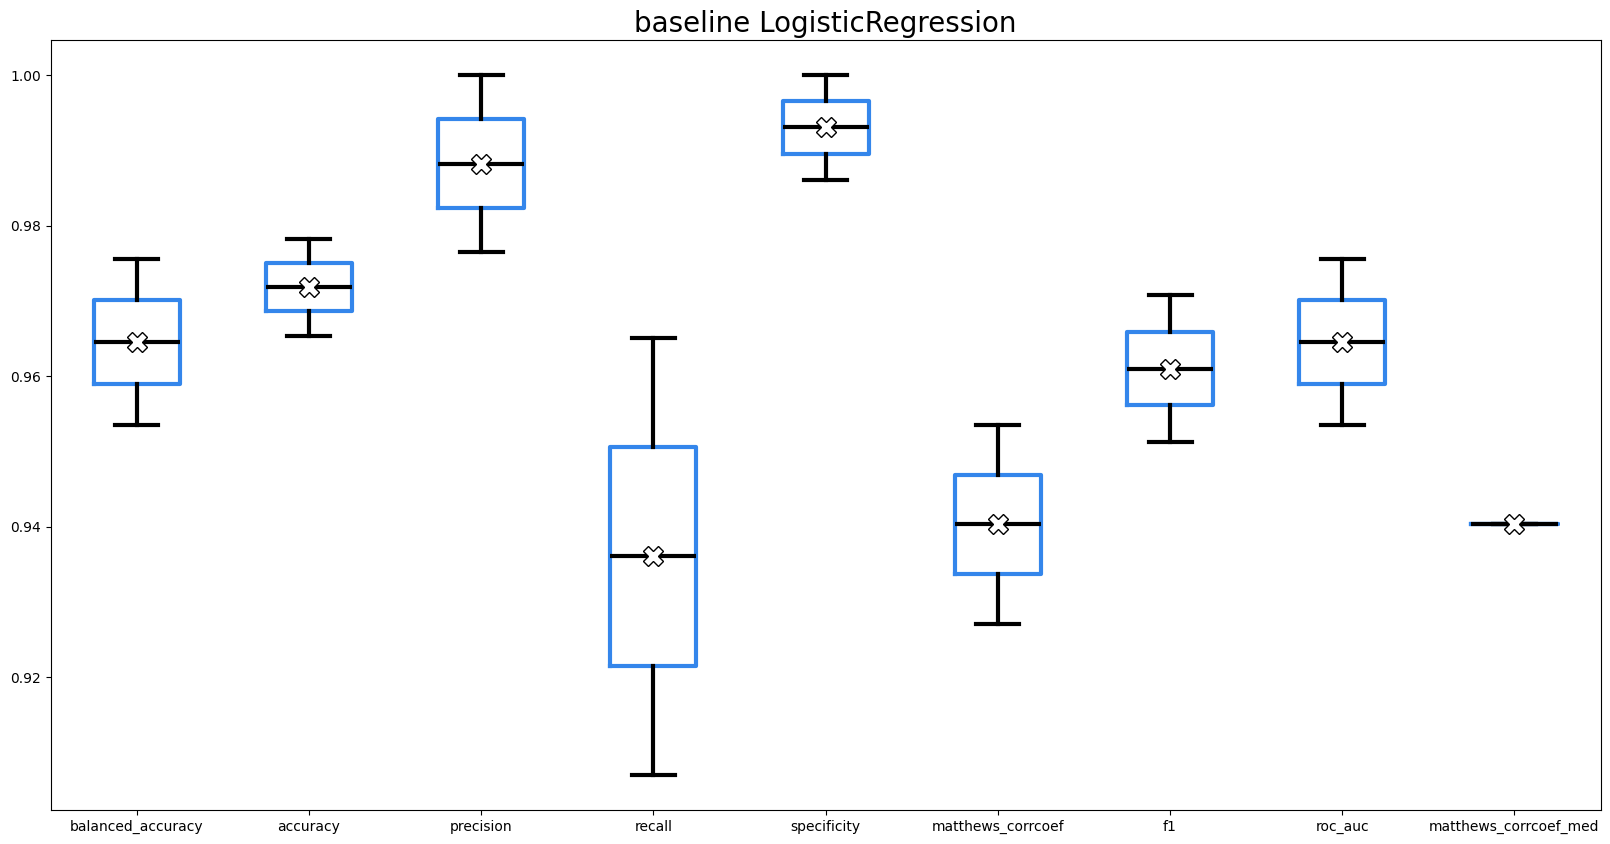

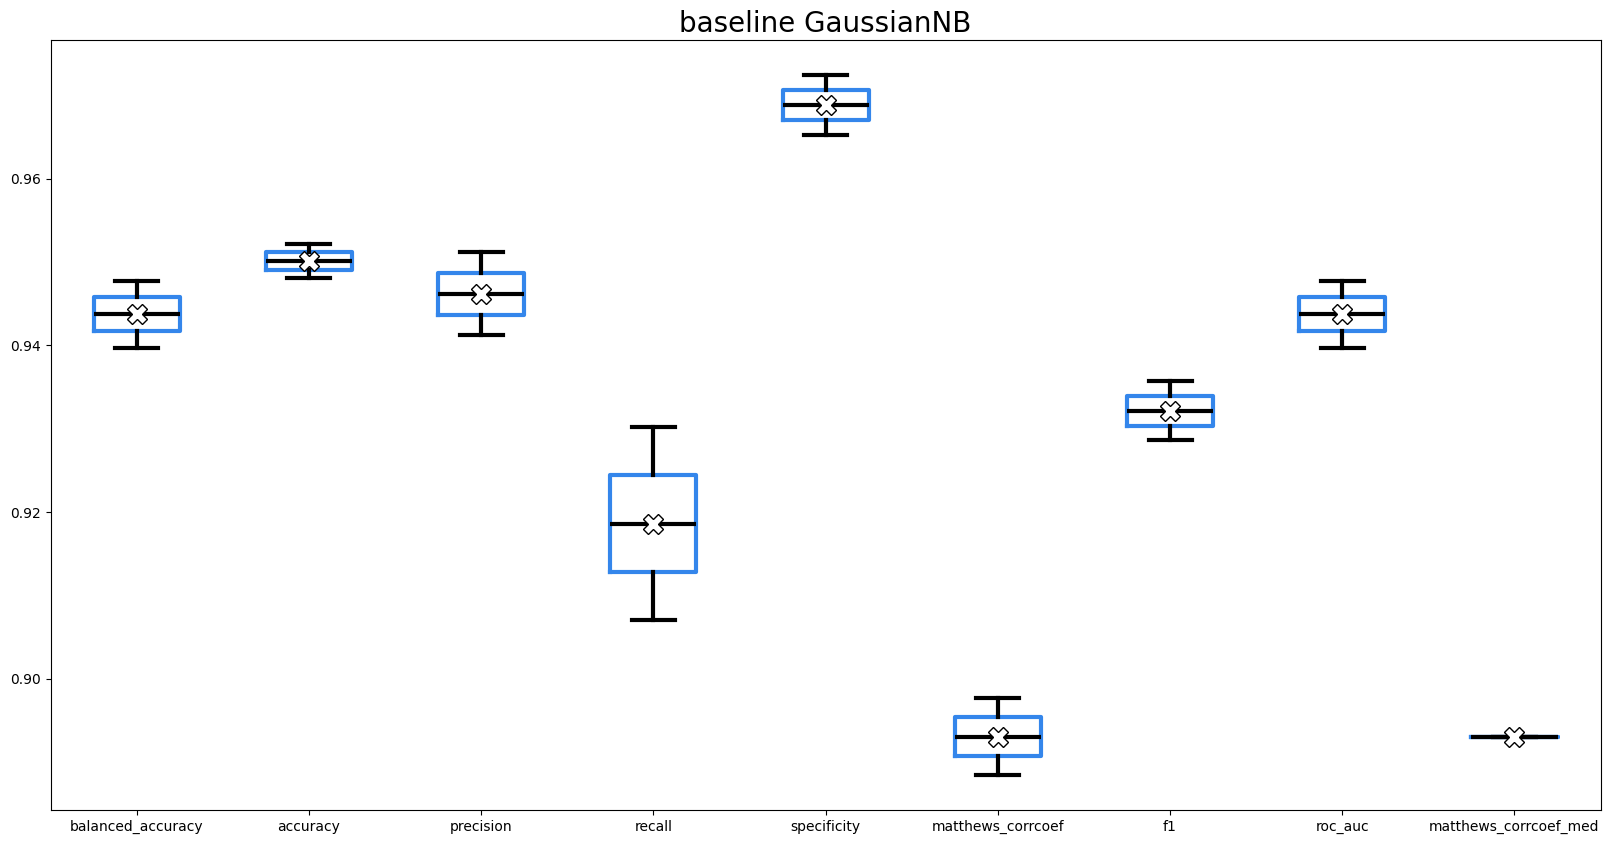

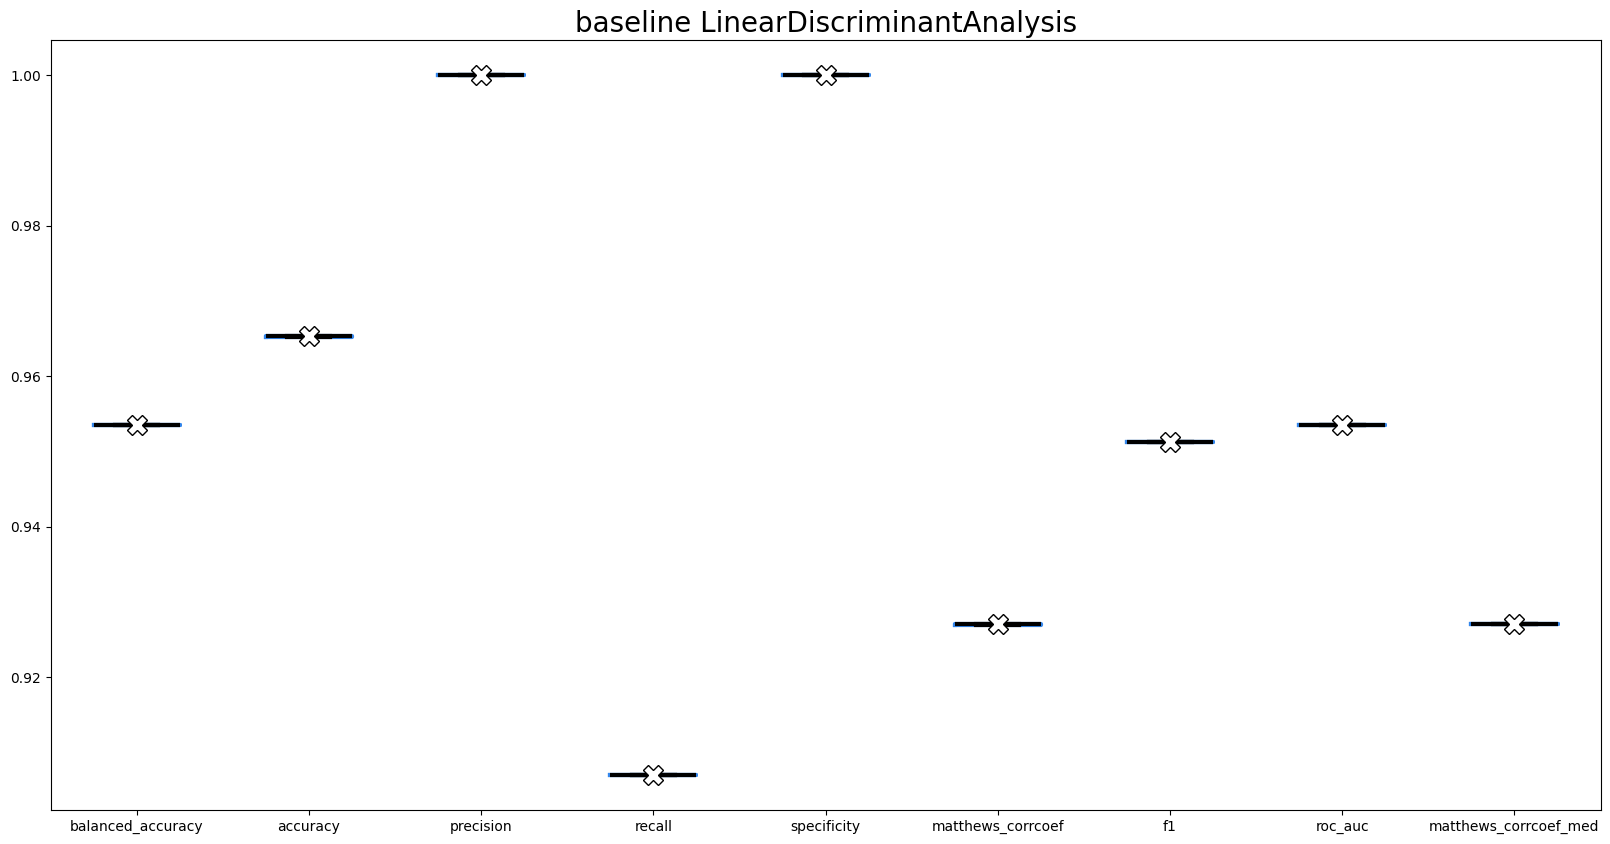

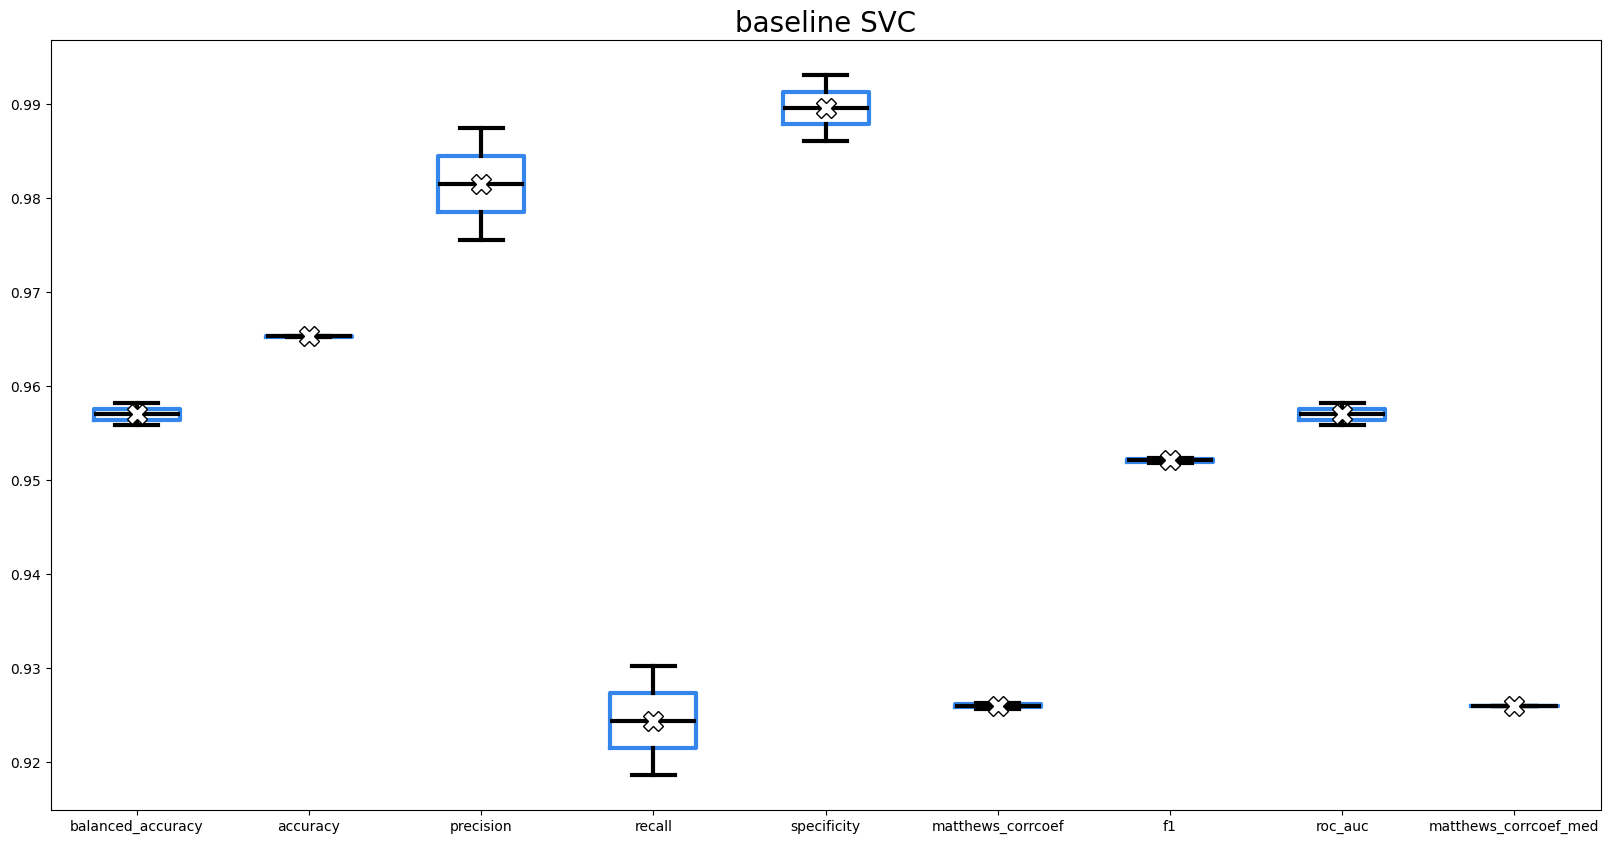

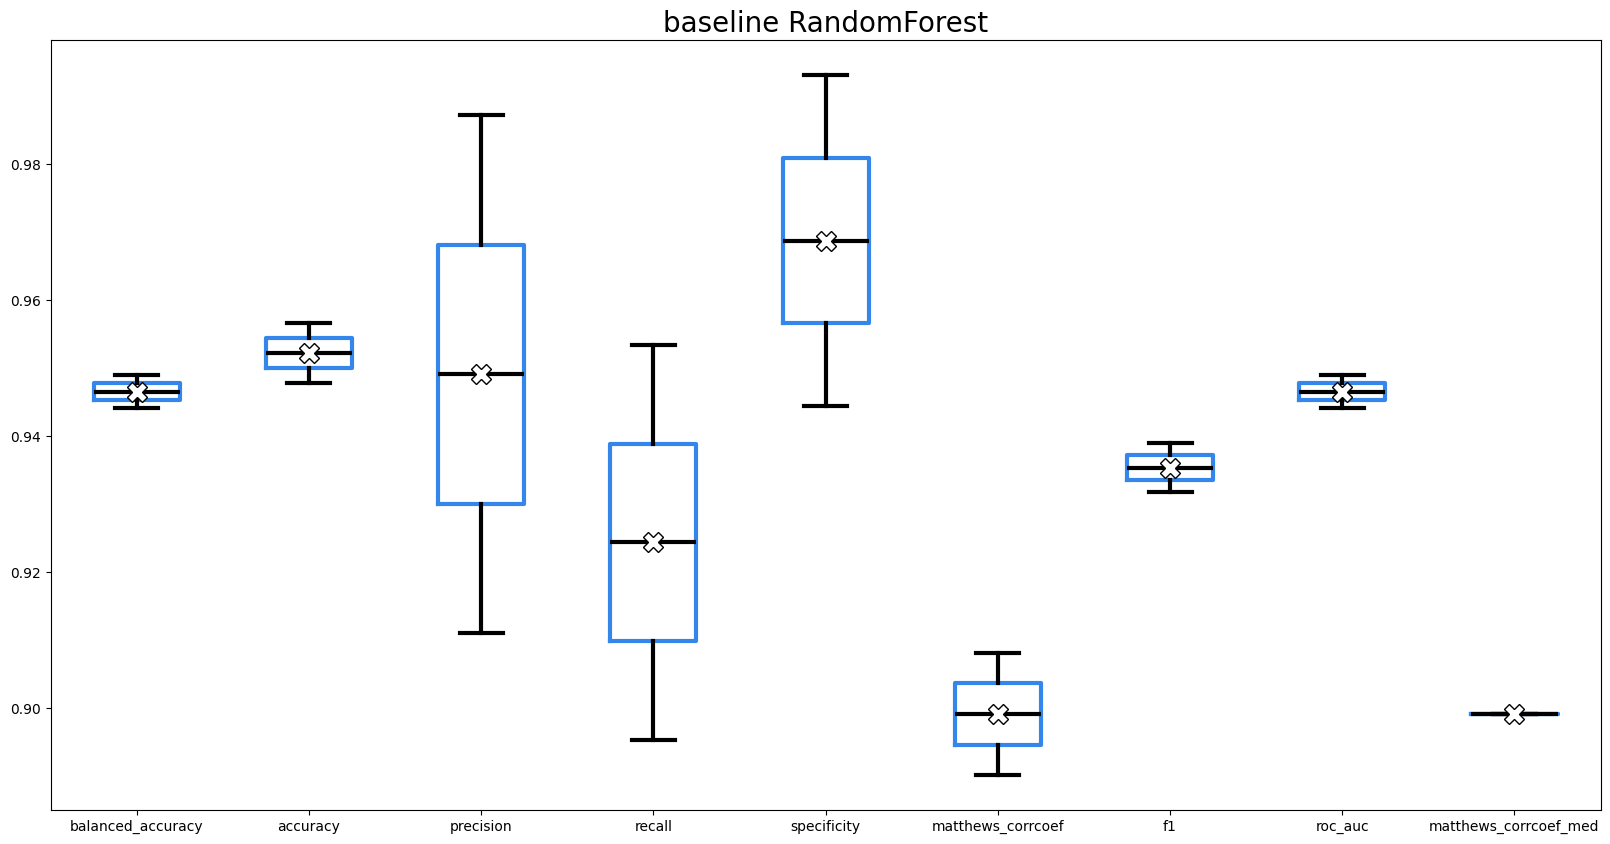

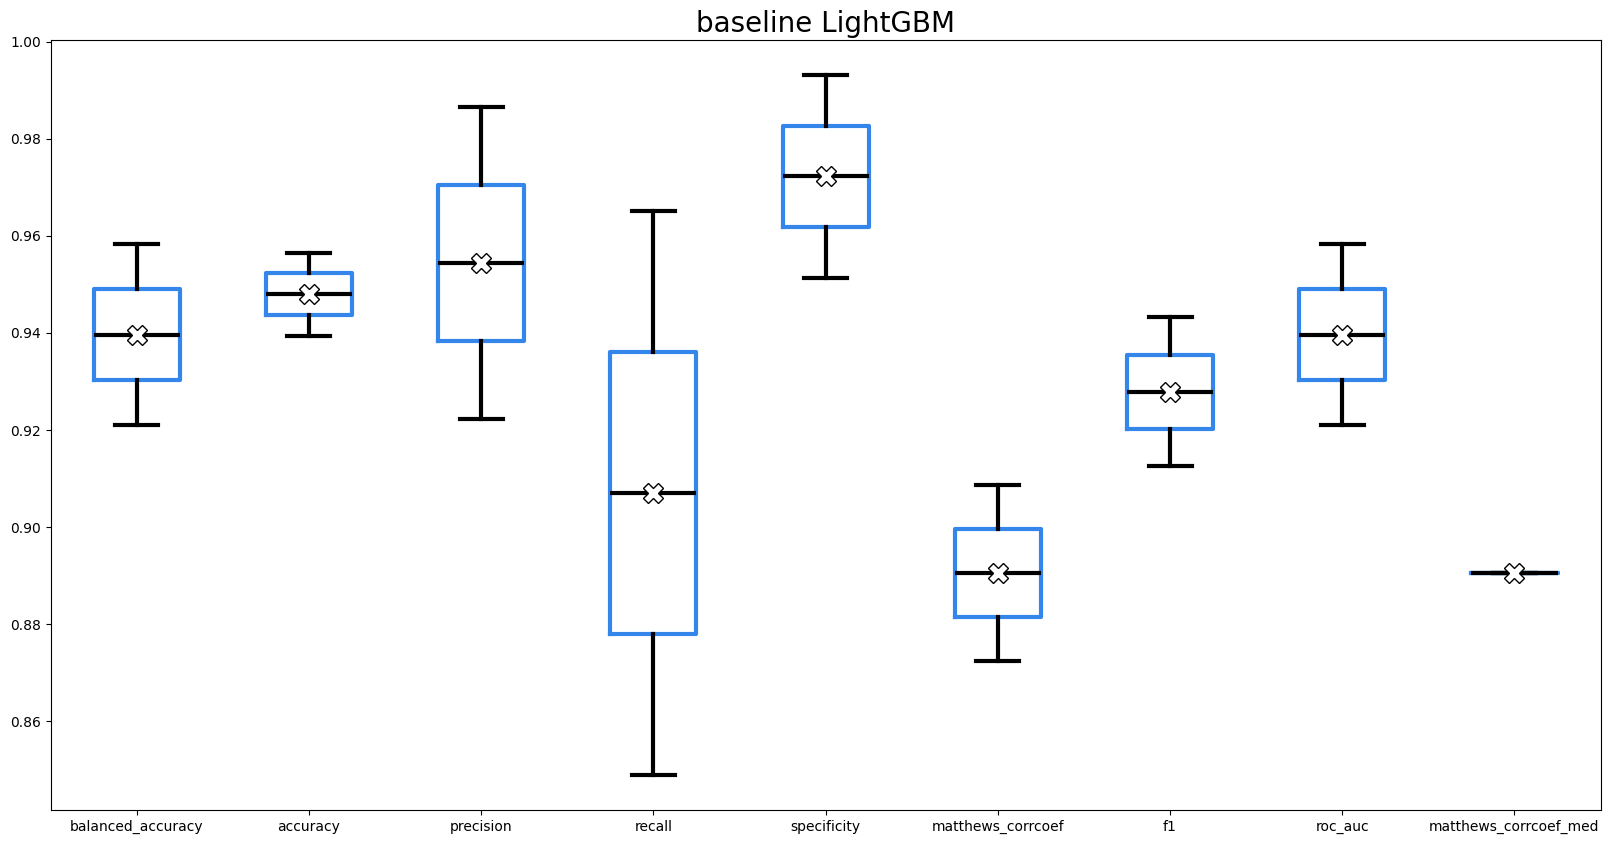

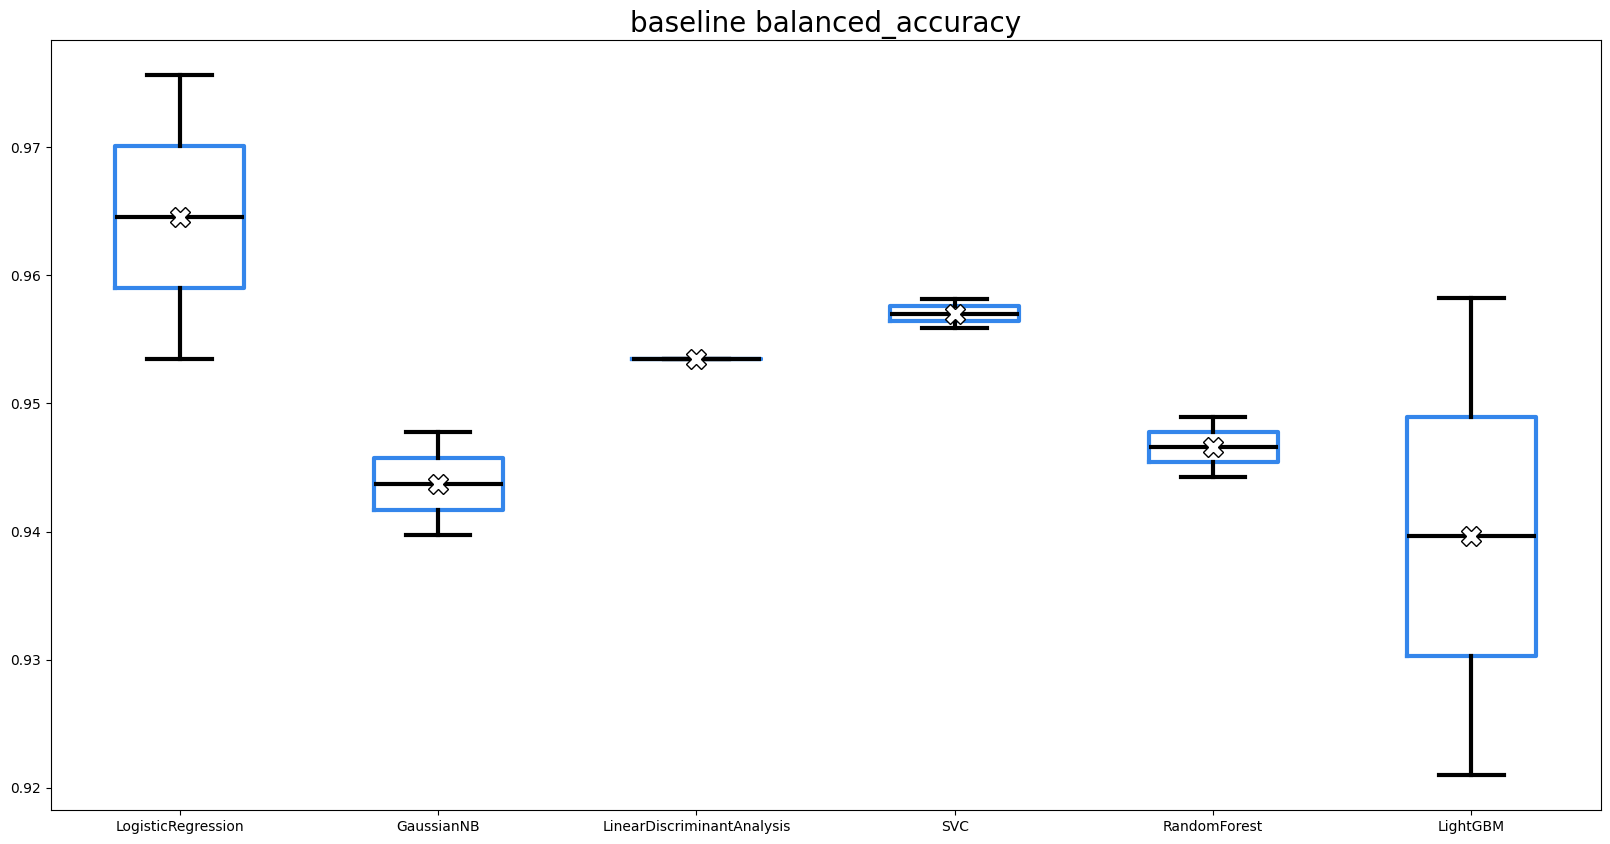

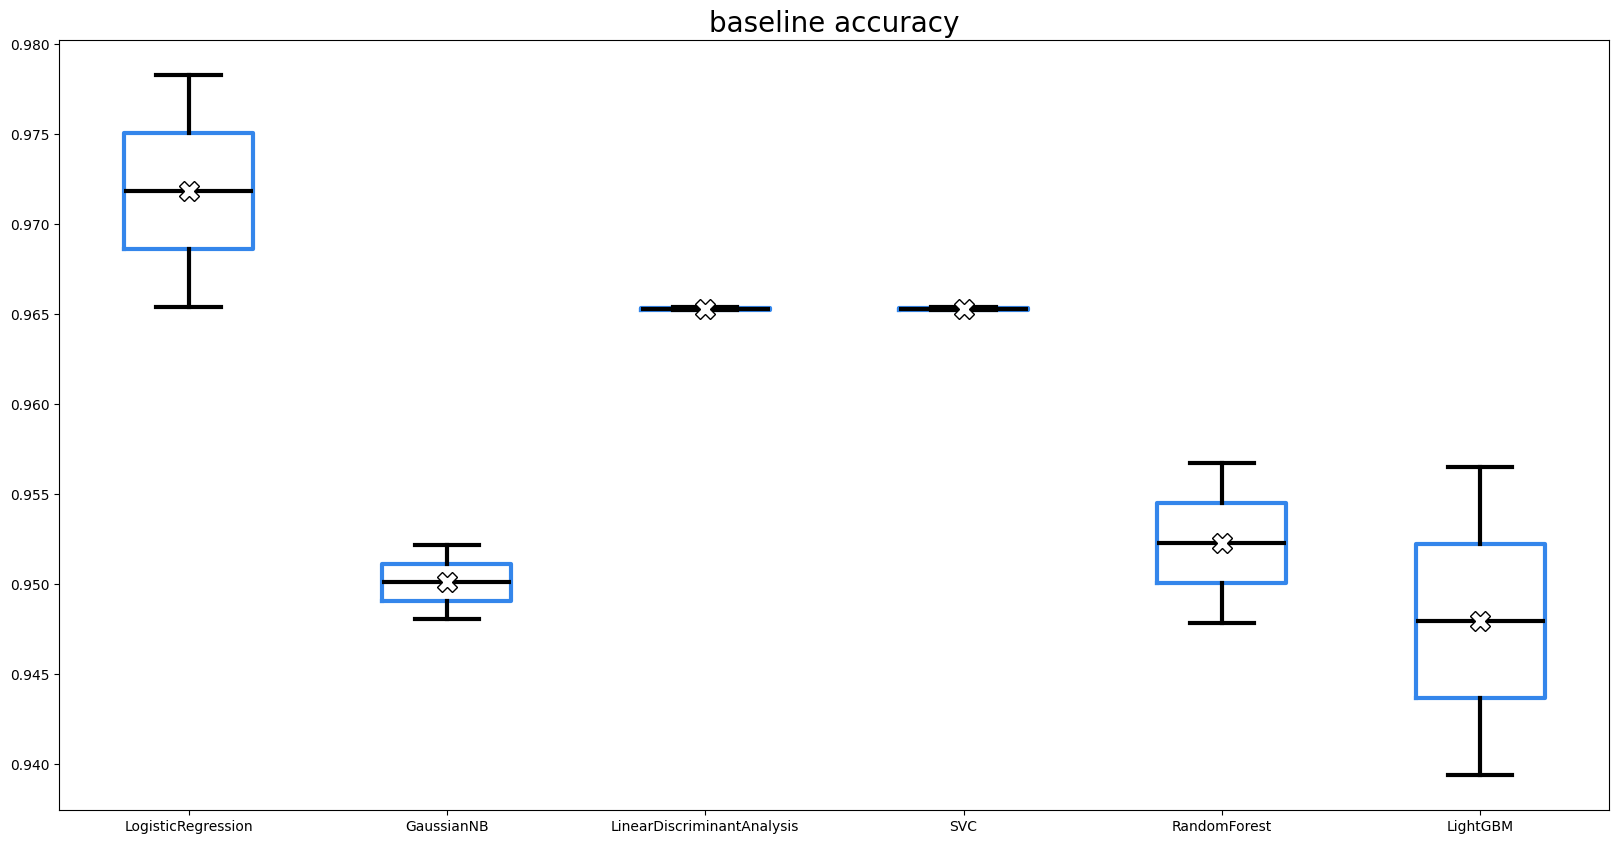

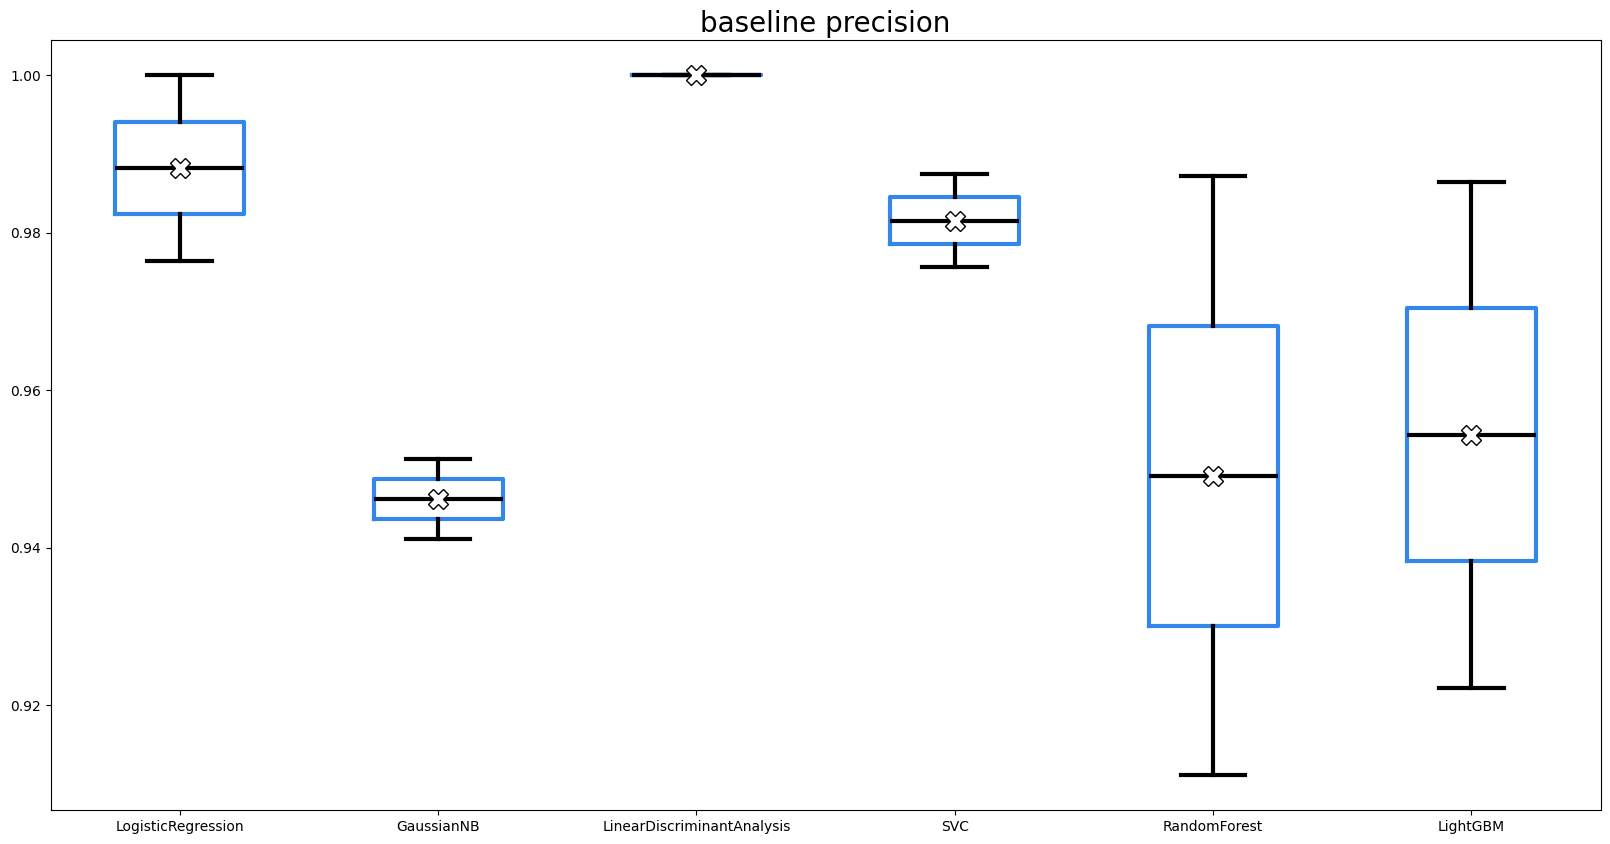

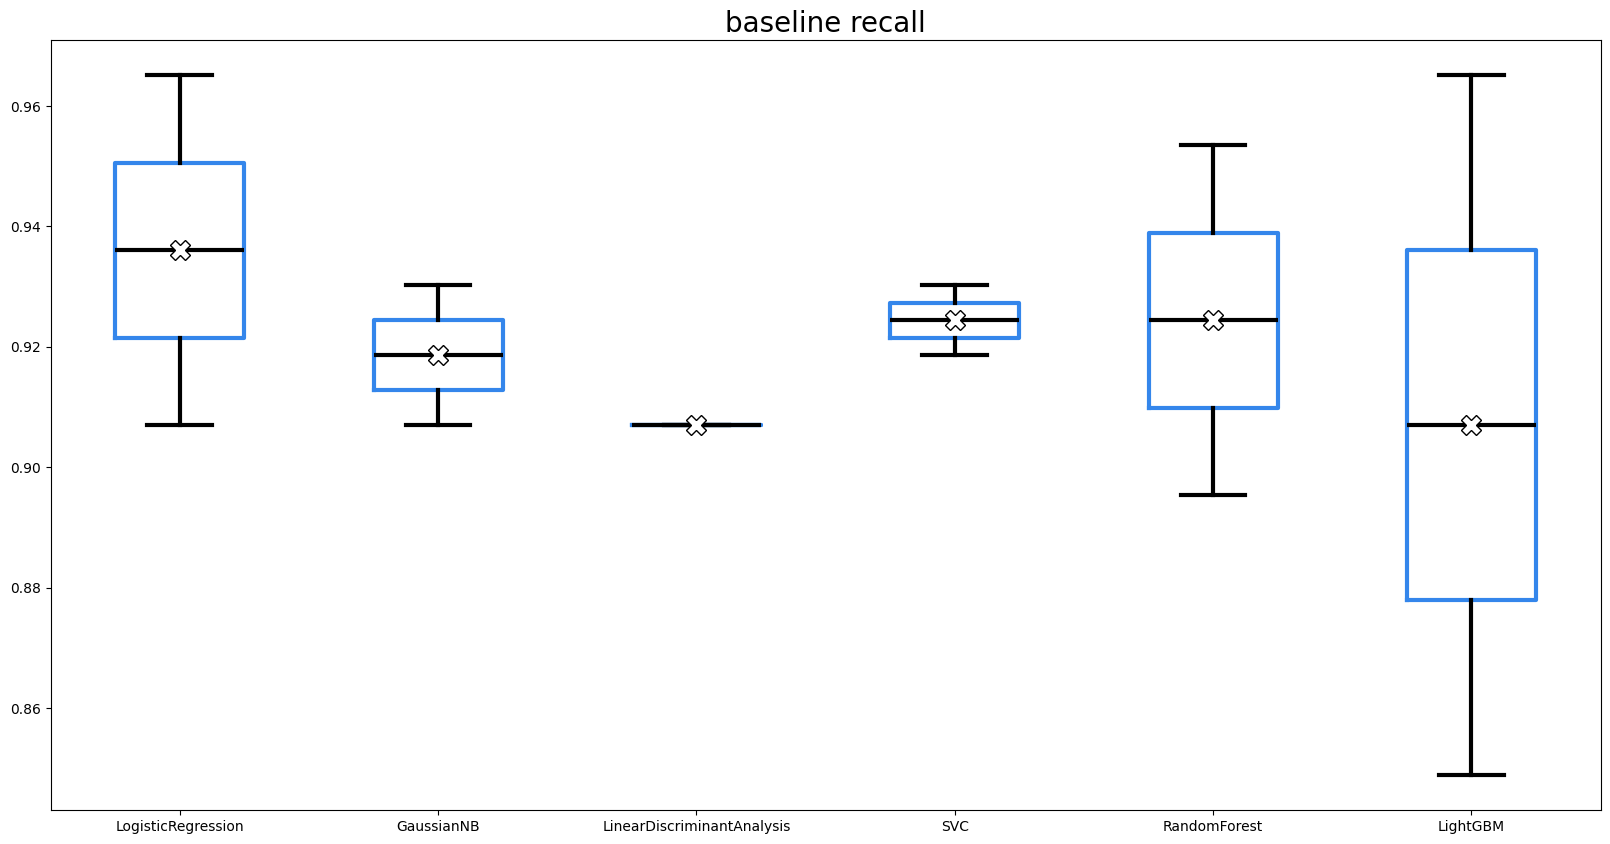

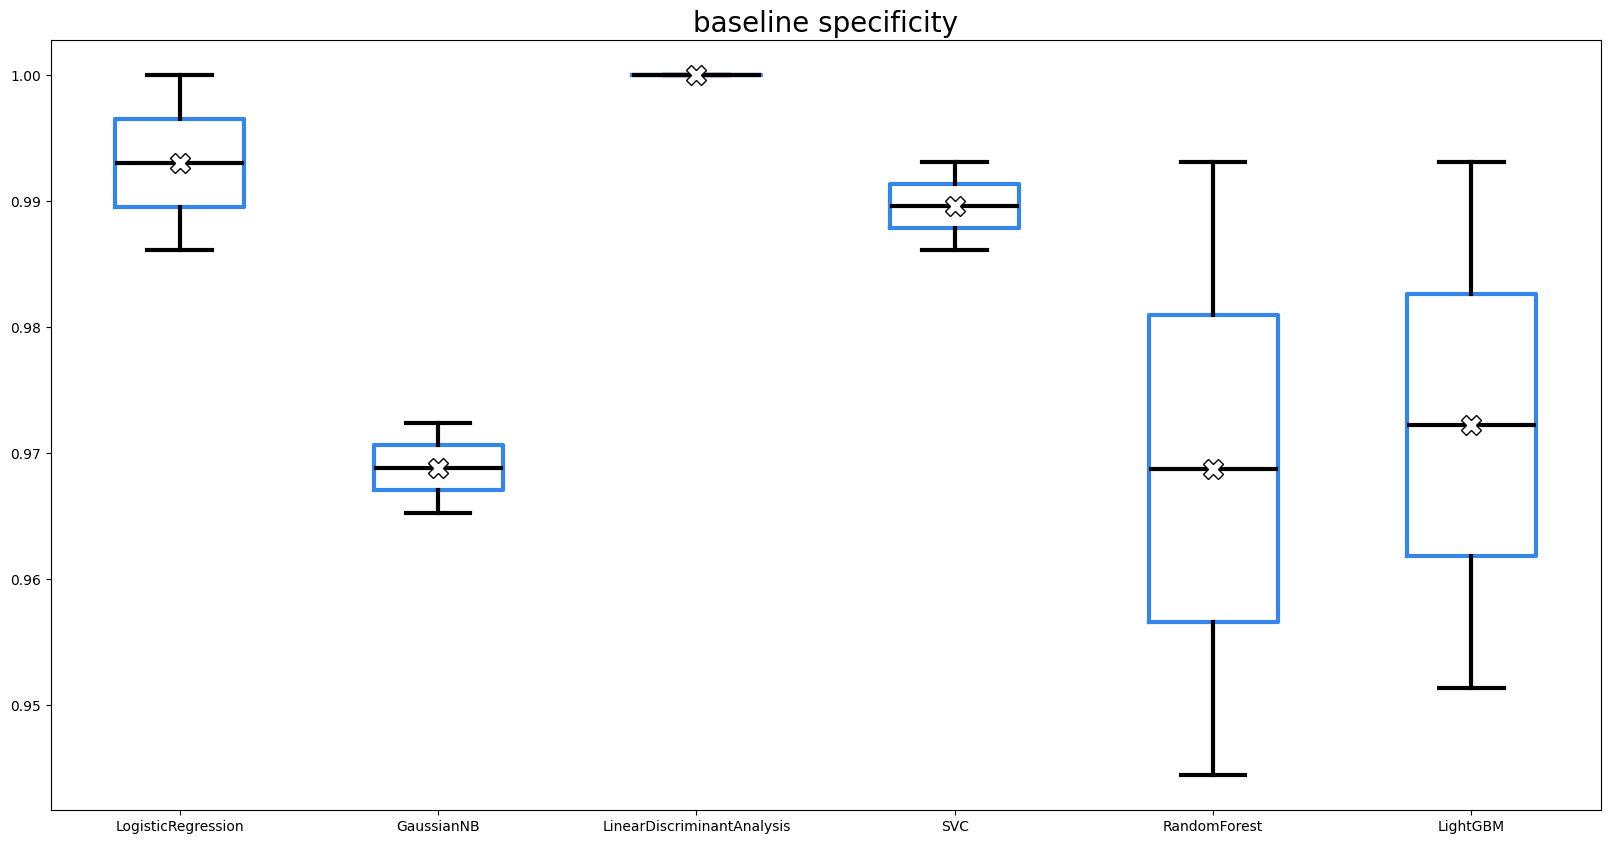

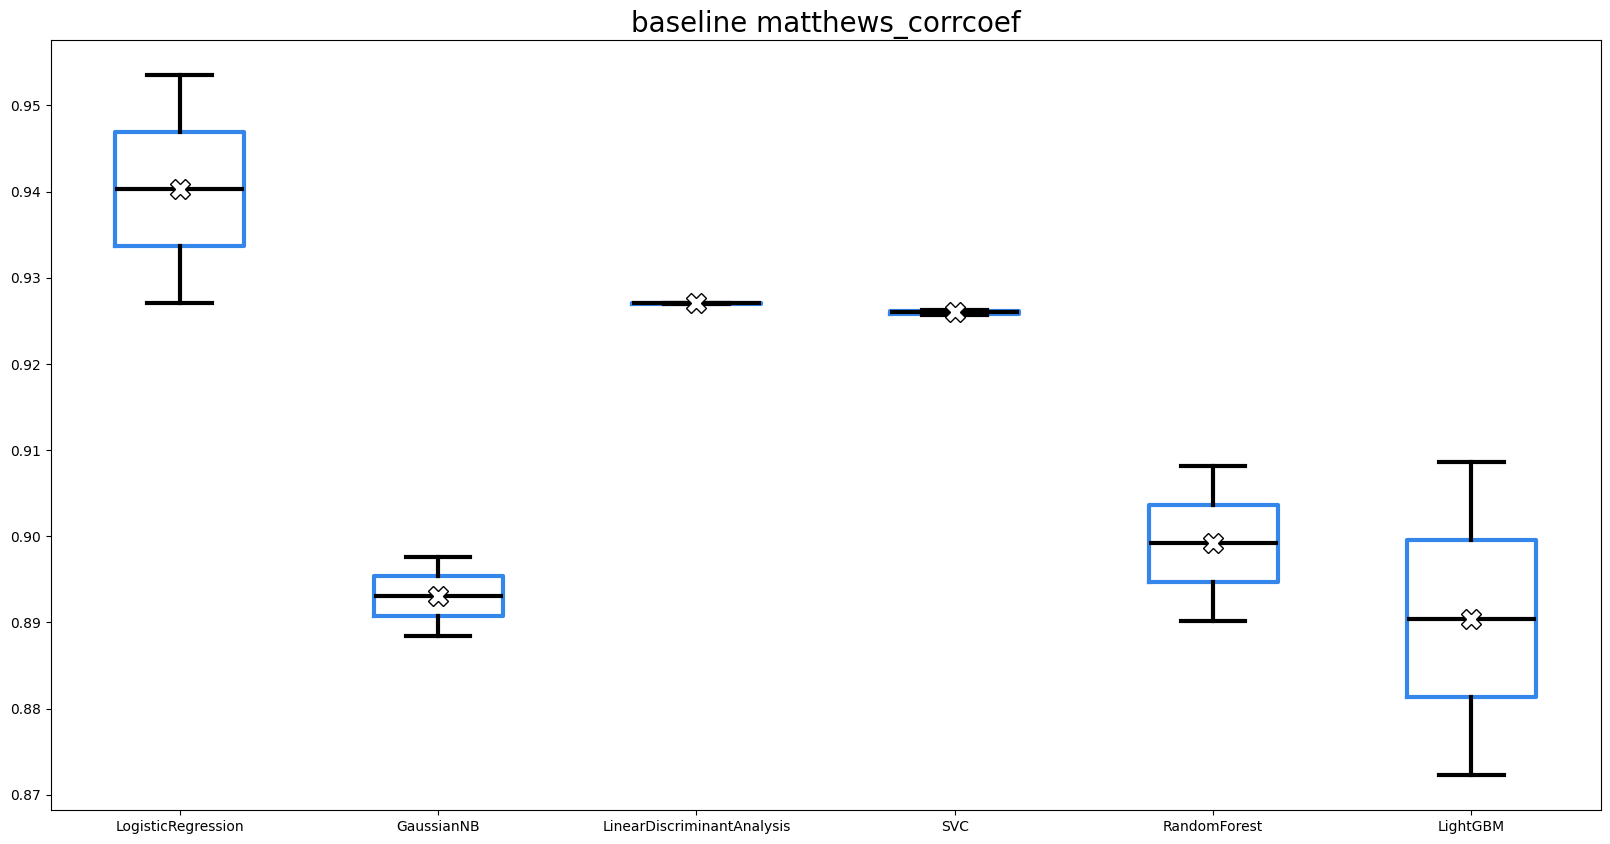

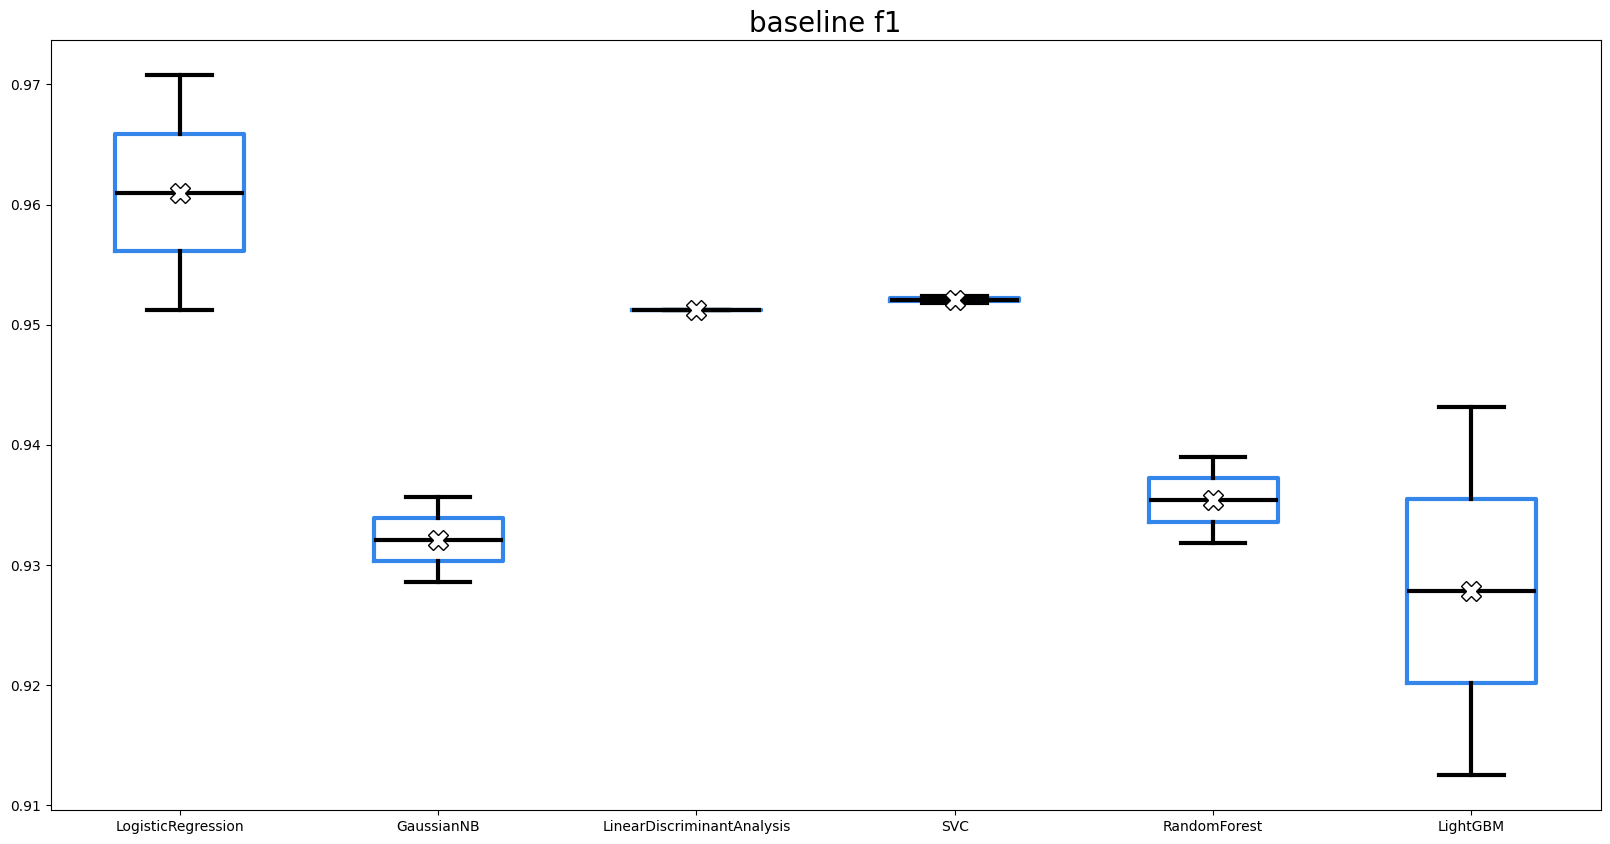

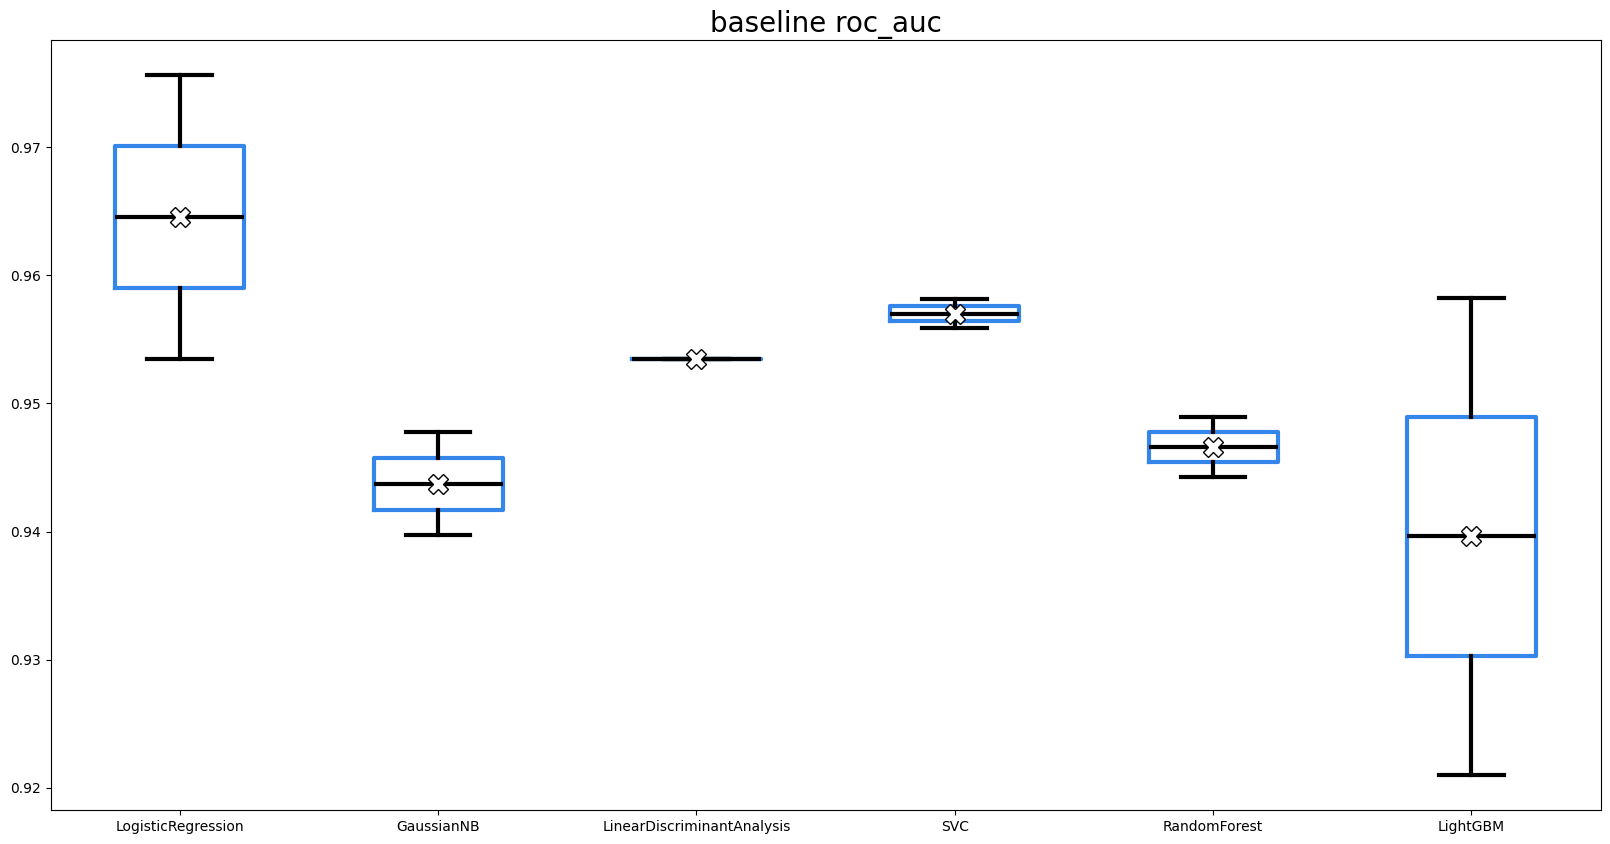

--- mrmr ---


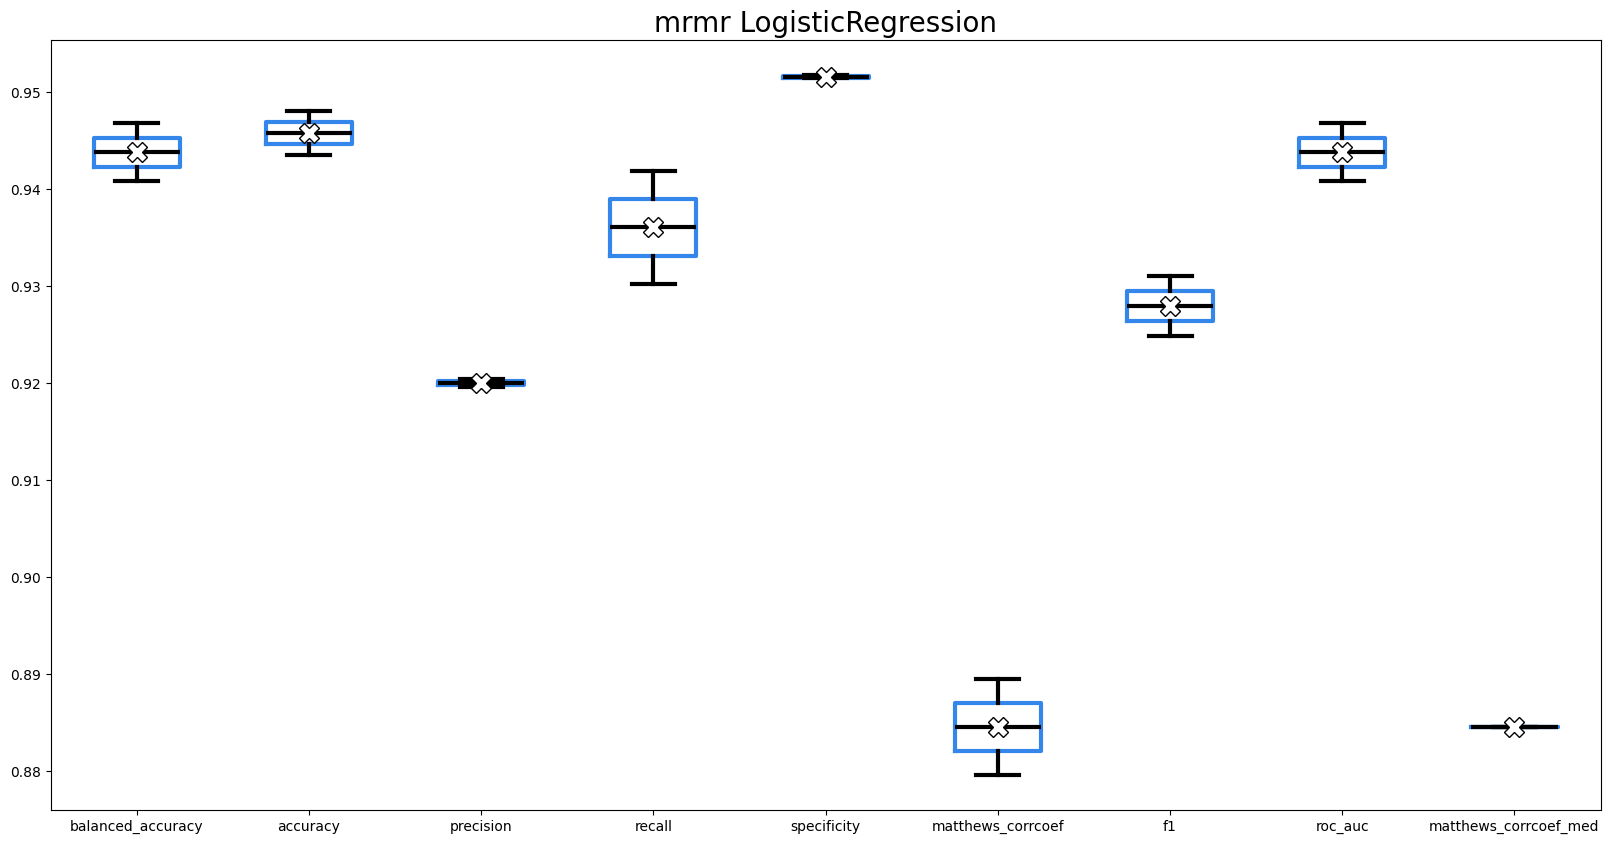

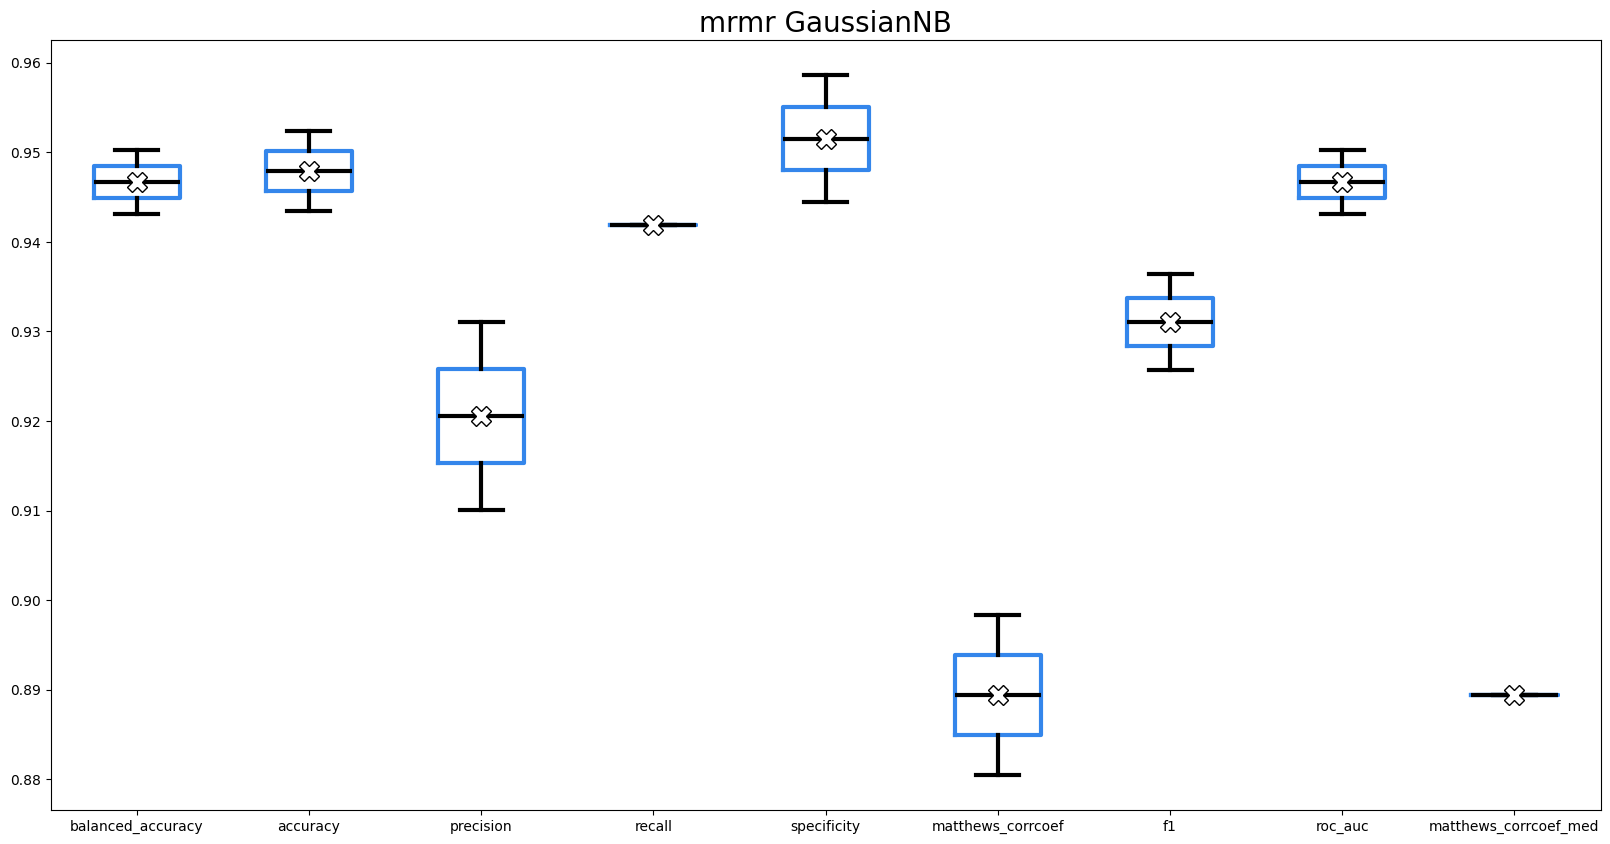

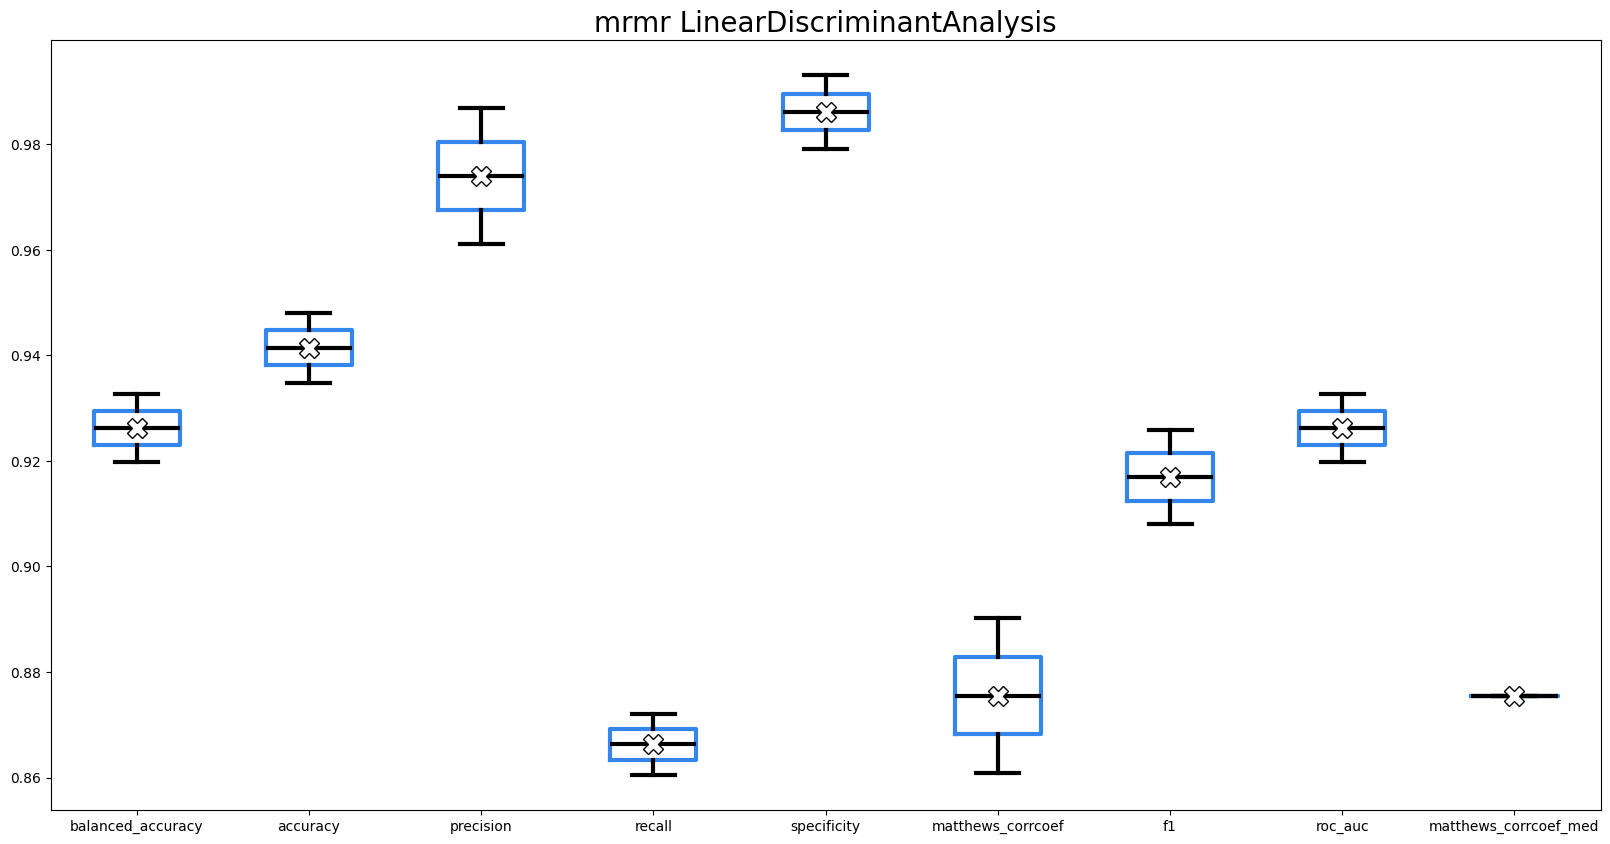

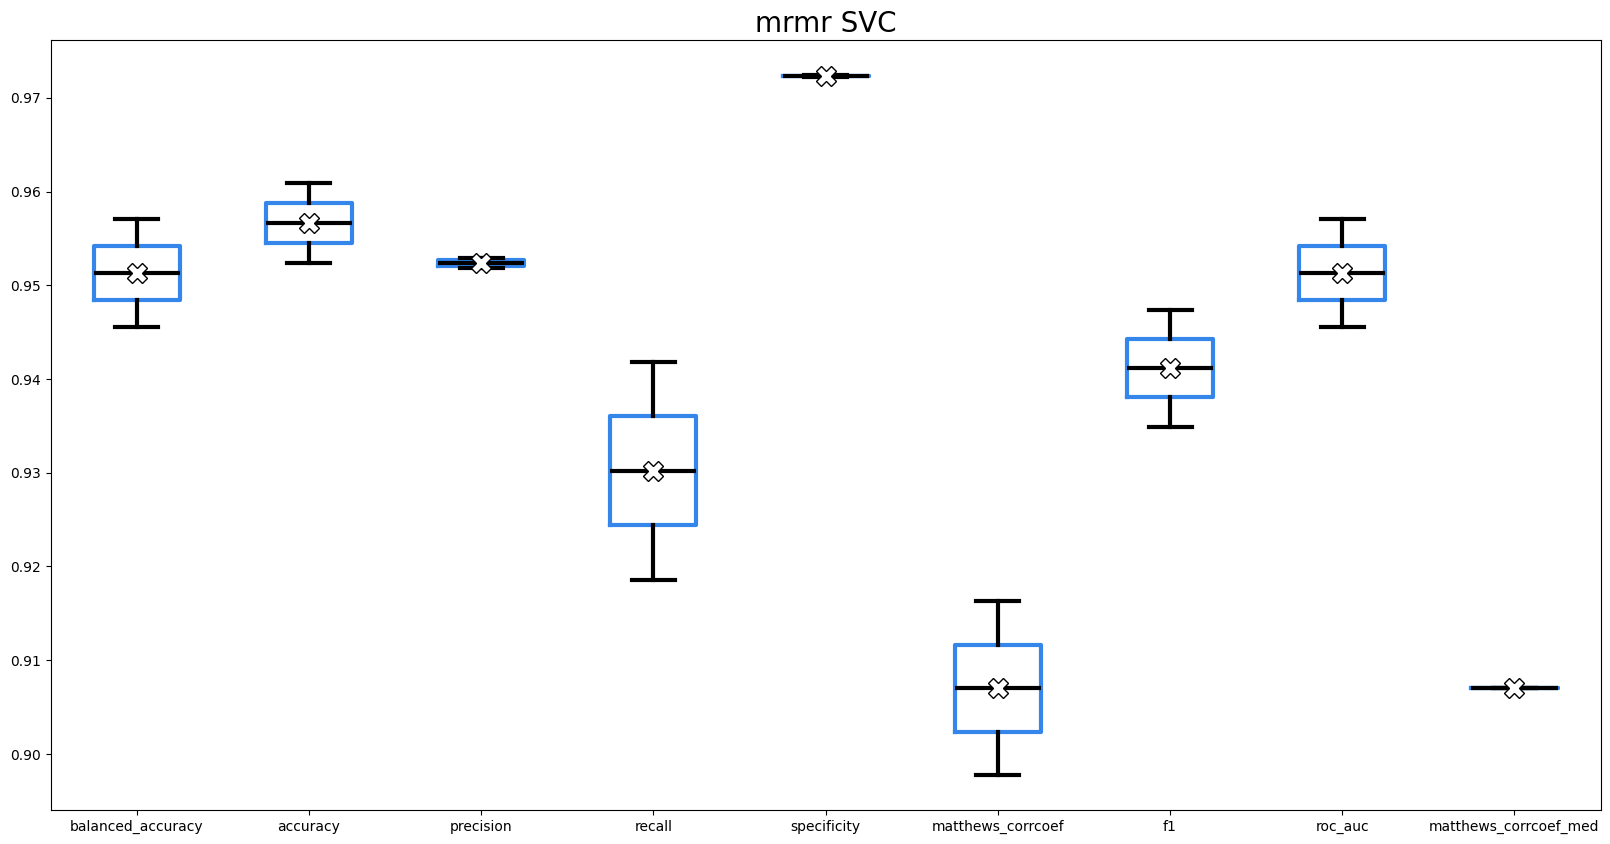

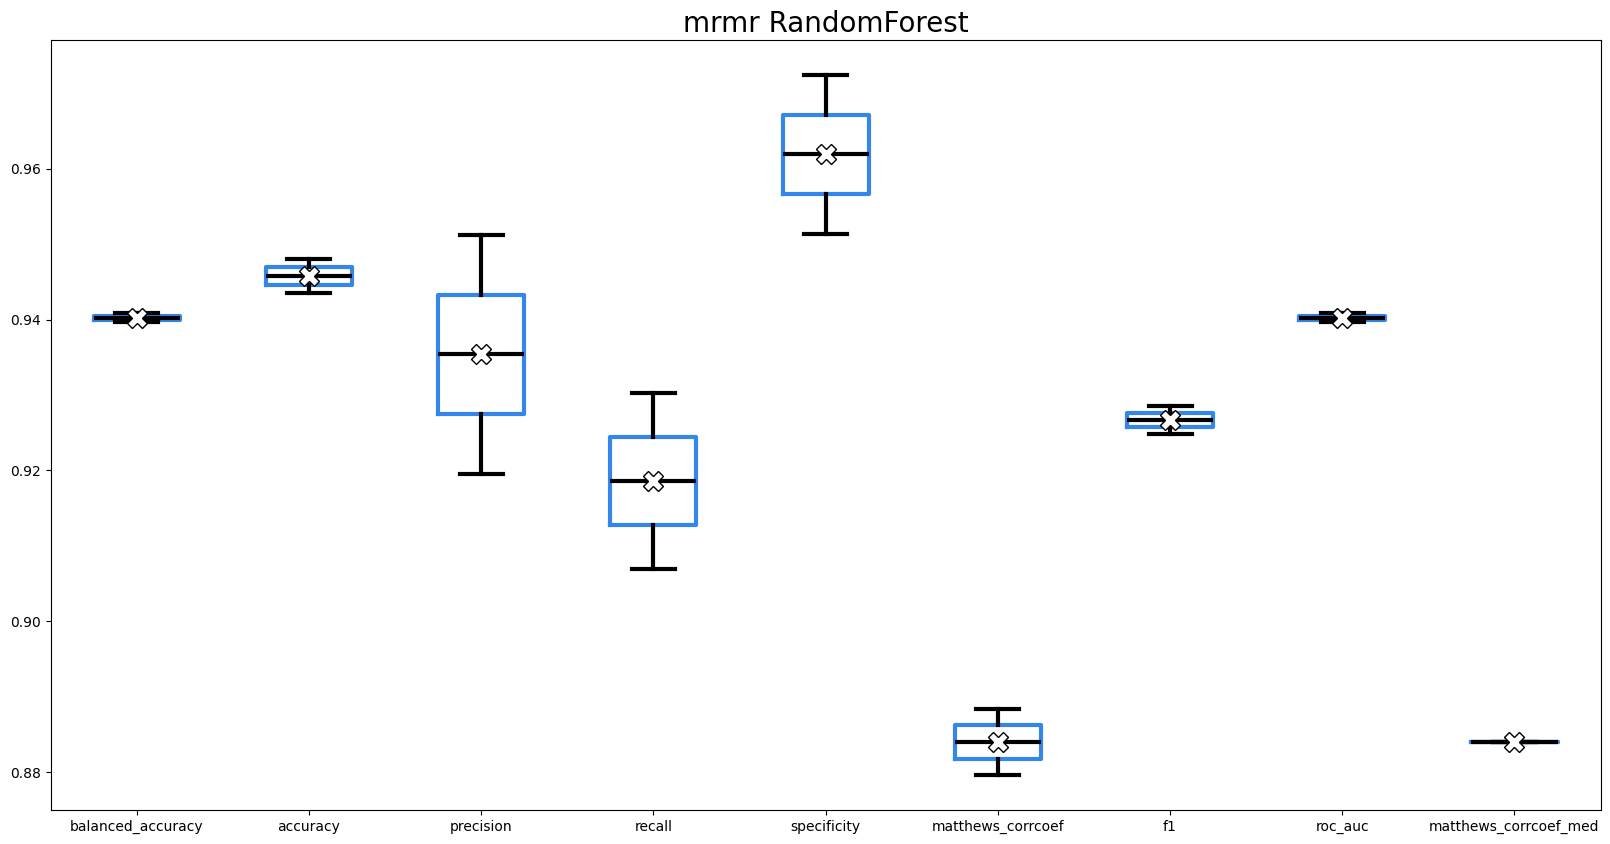

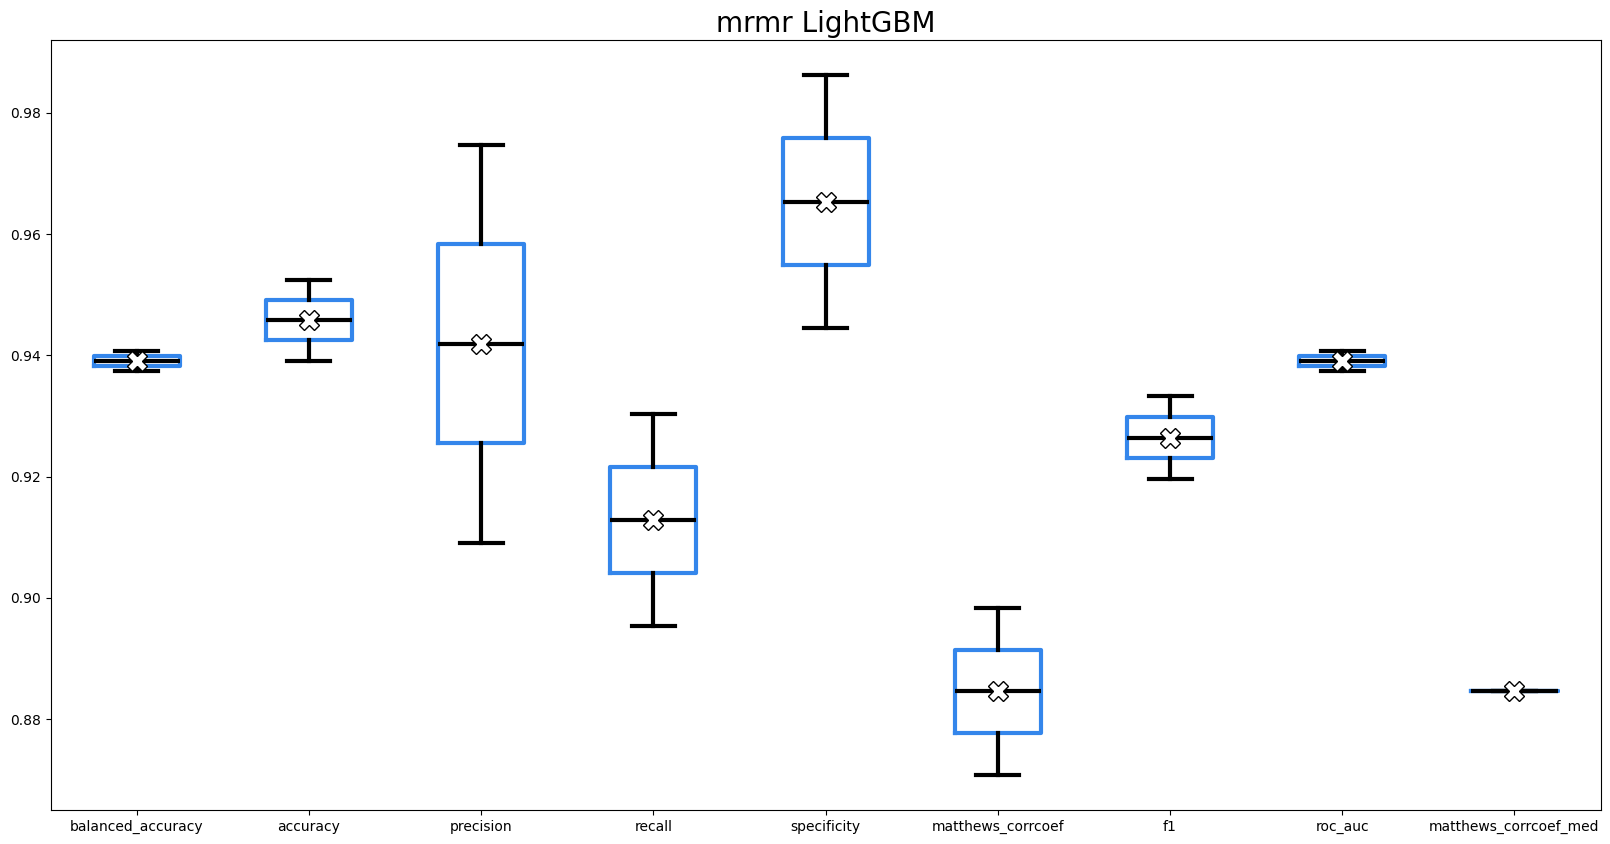

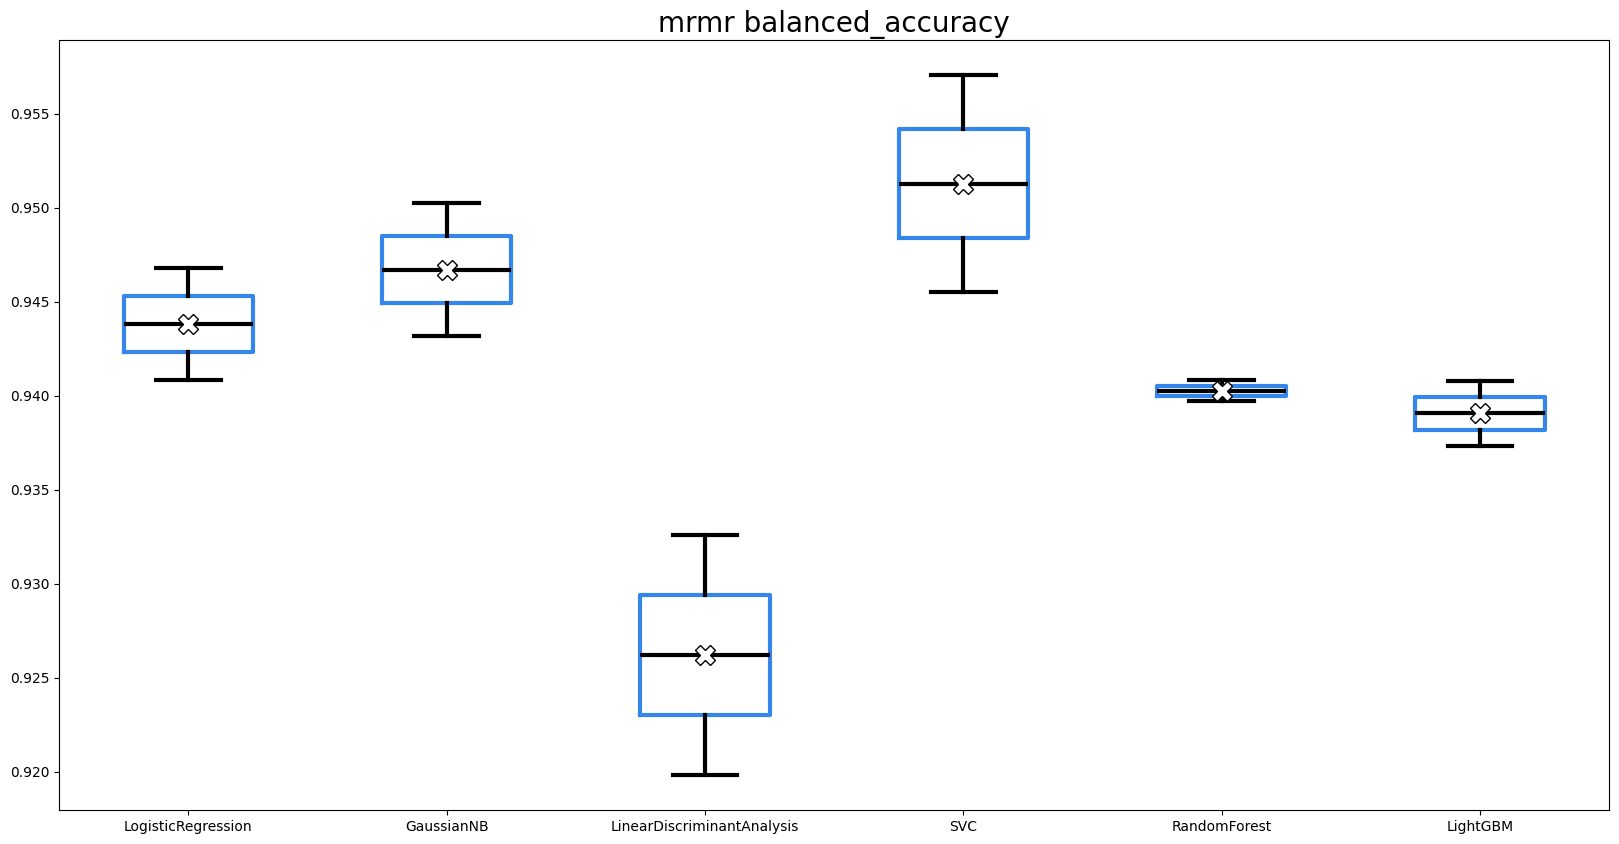

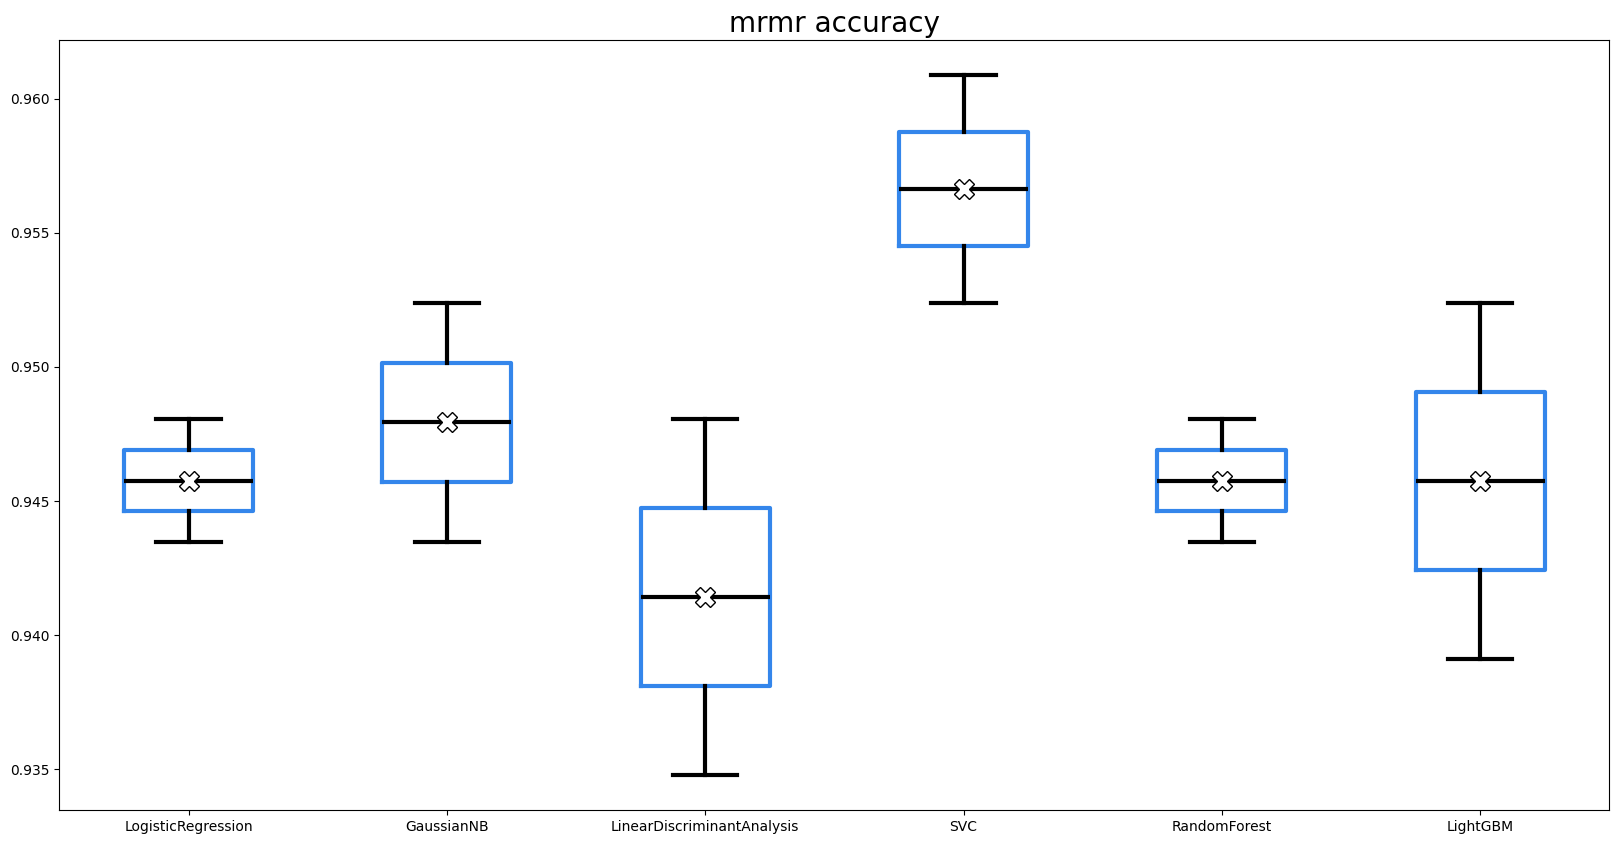

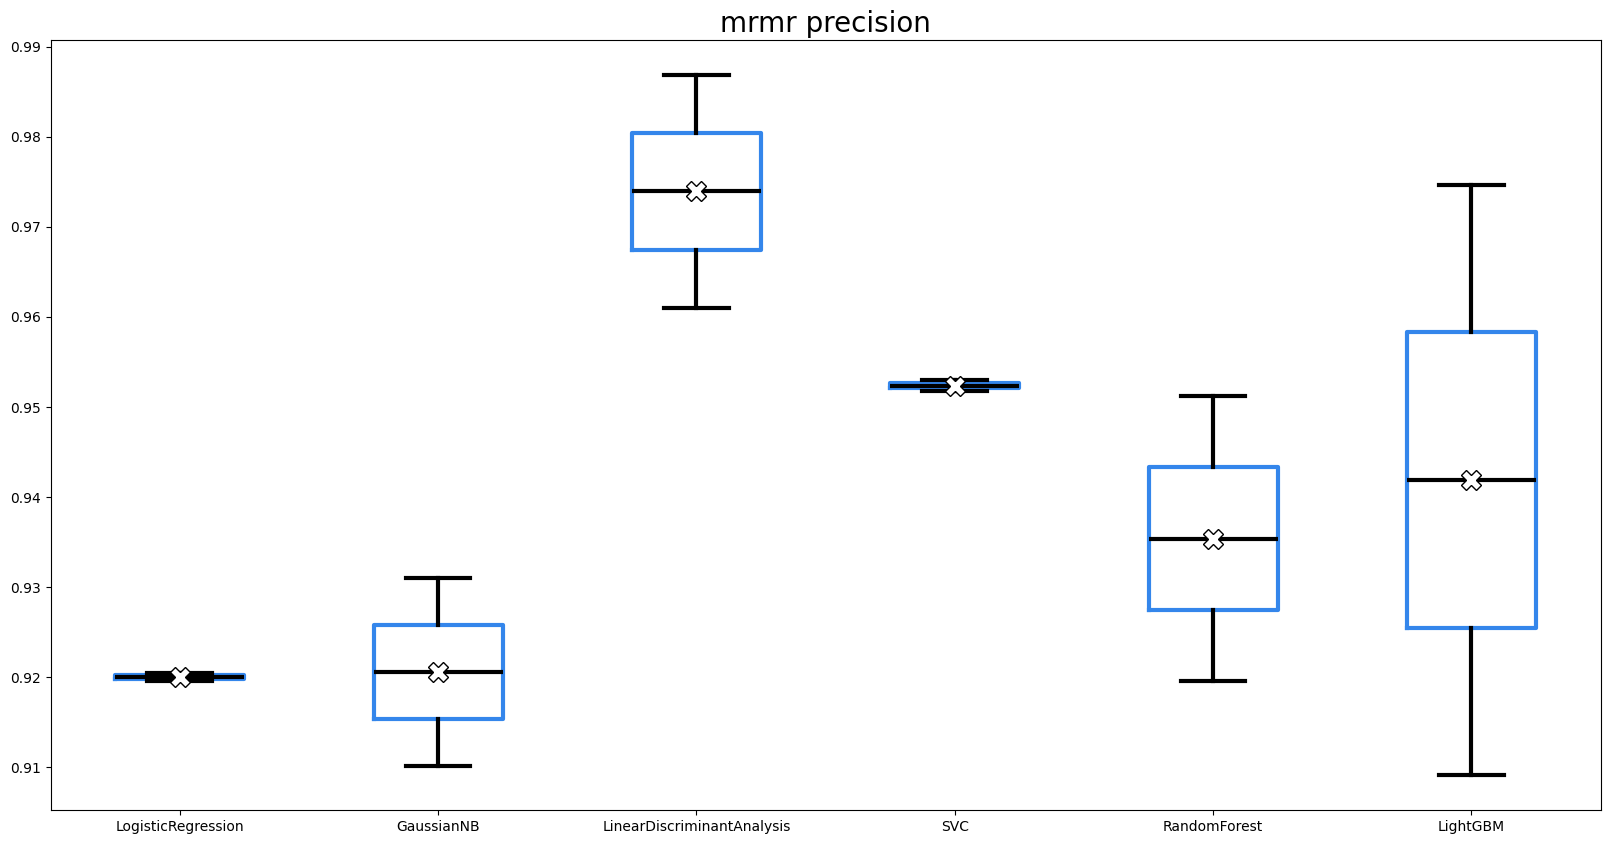

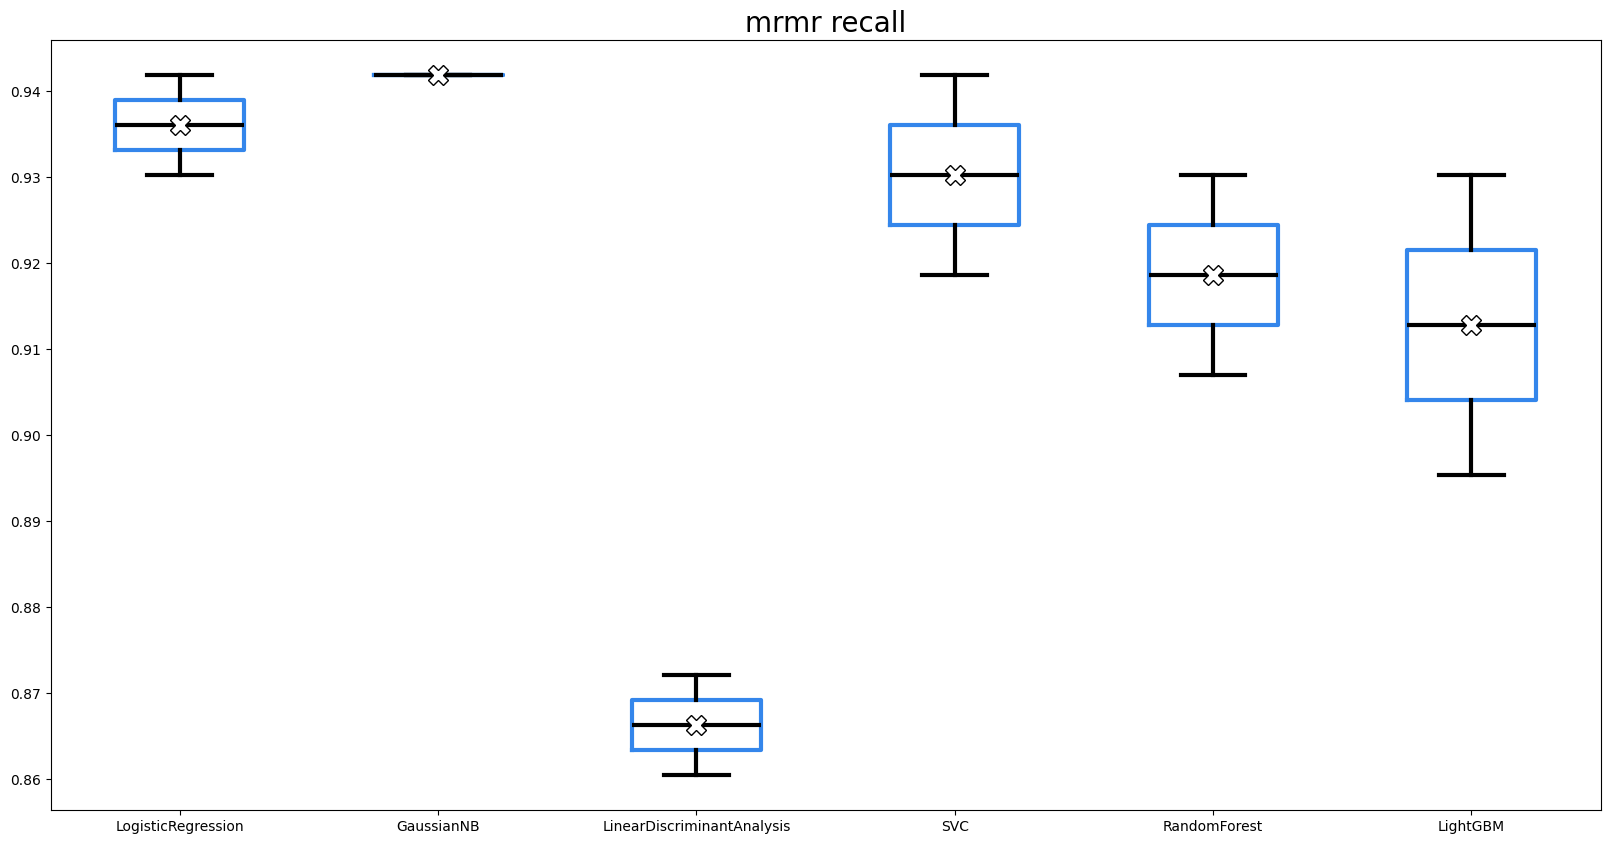

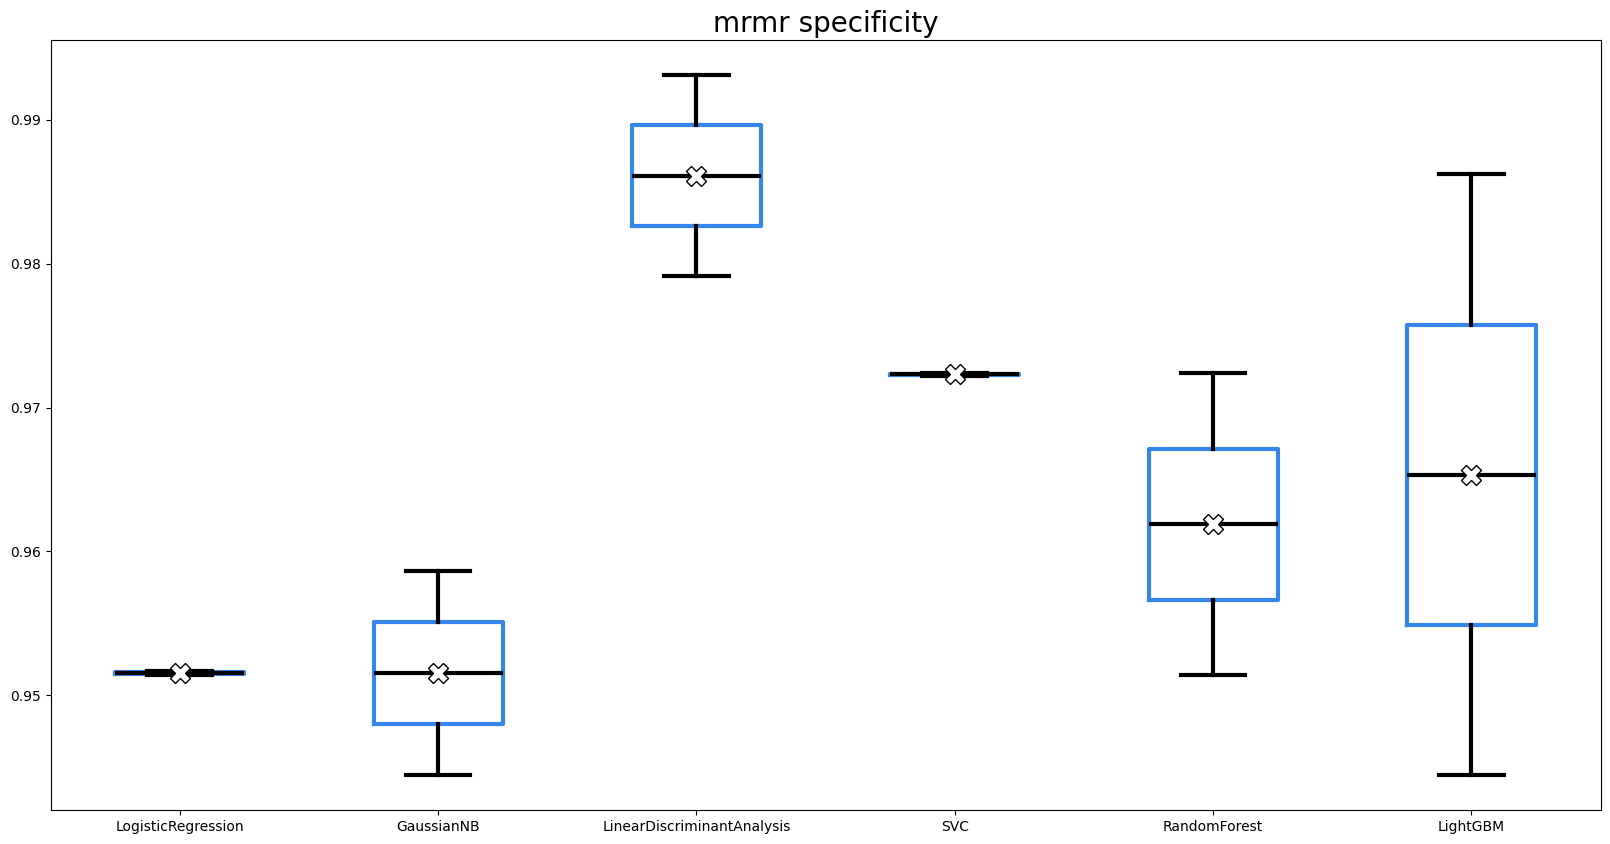

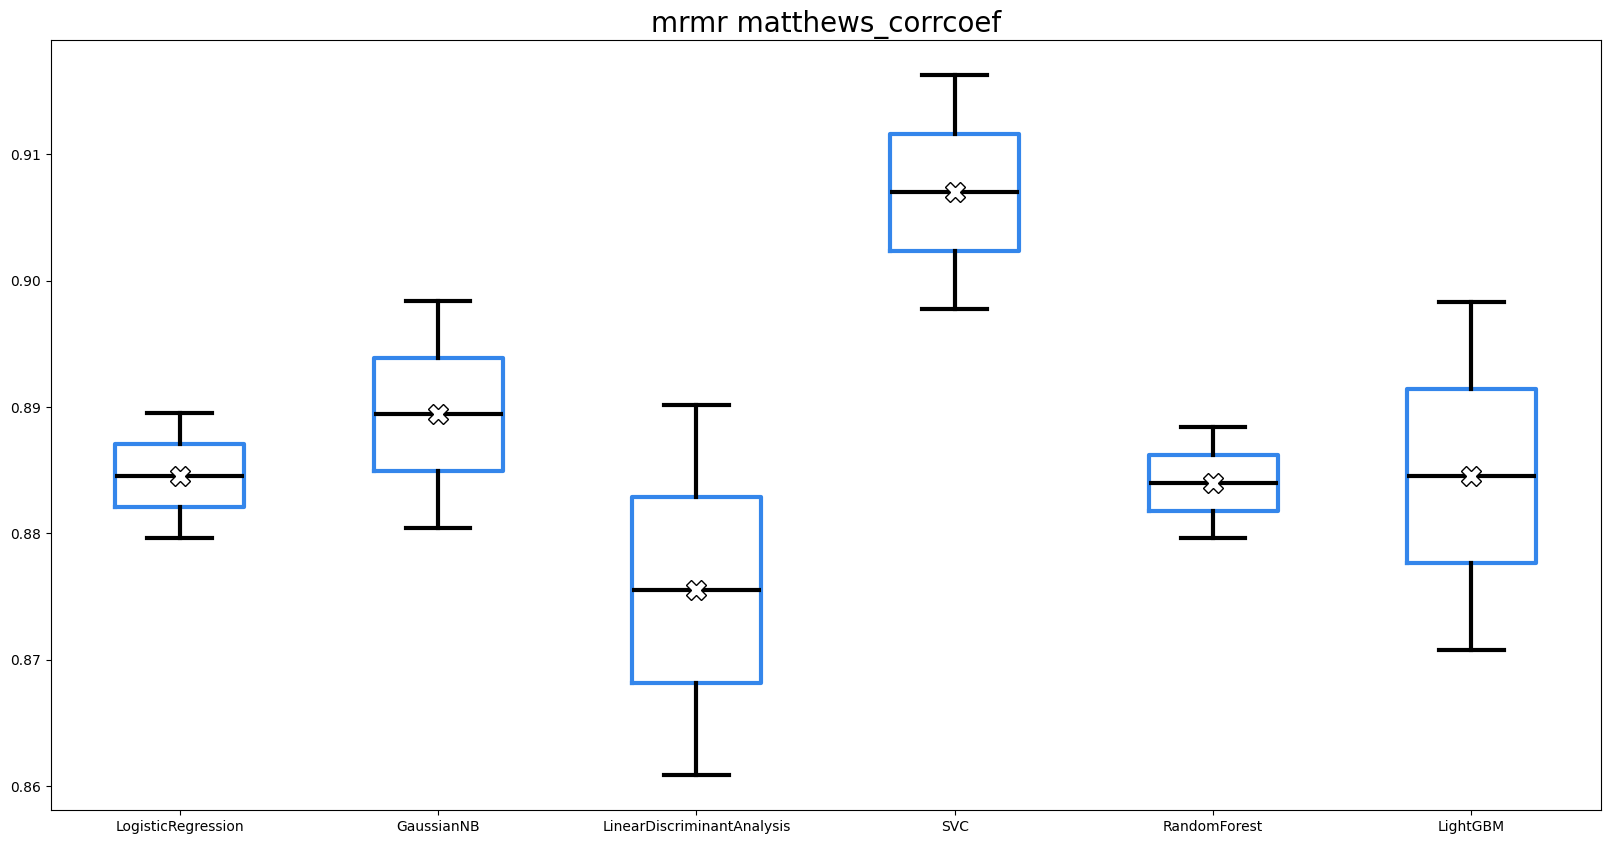

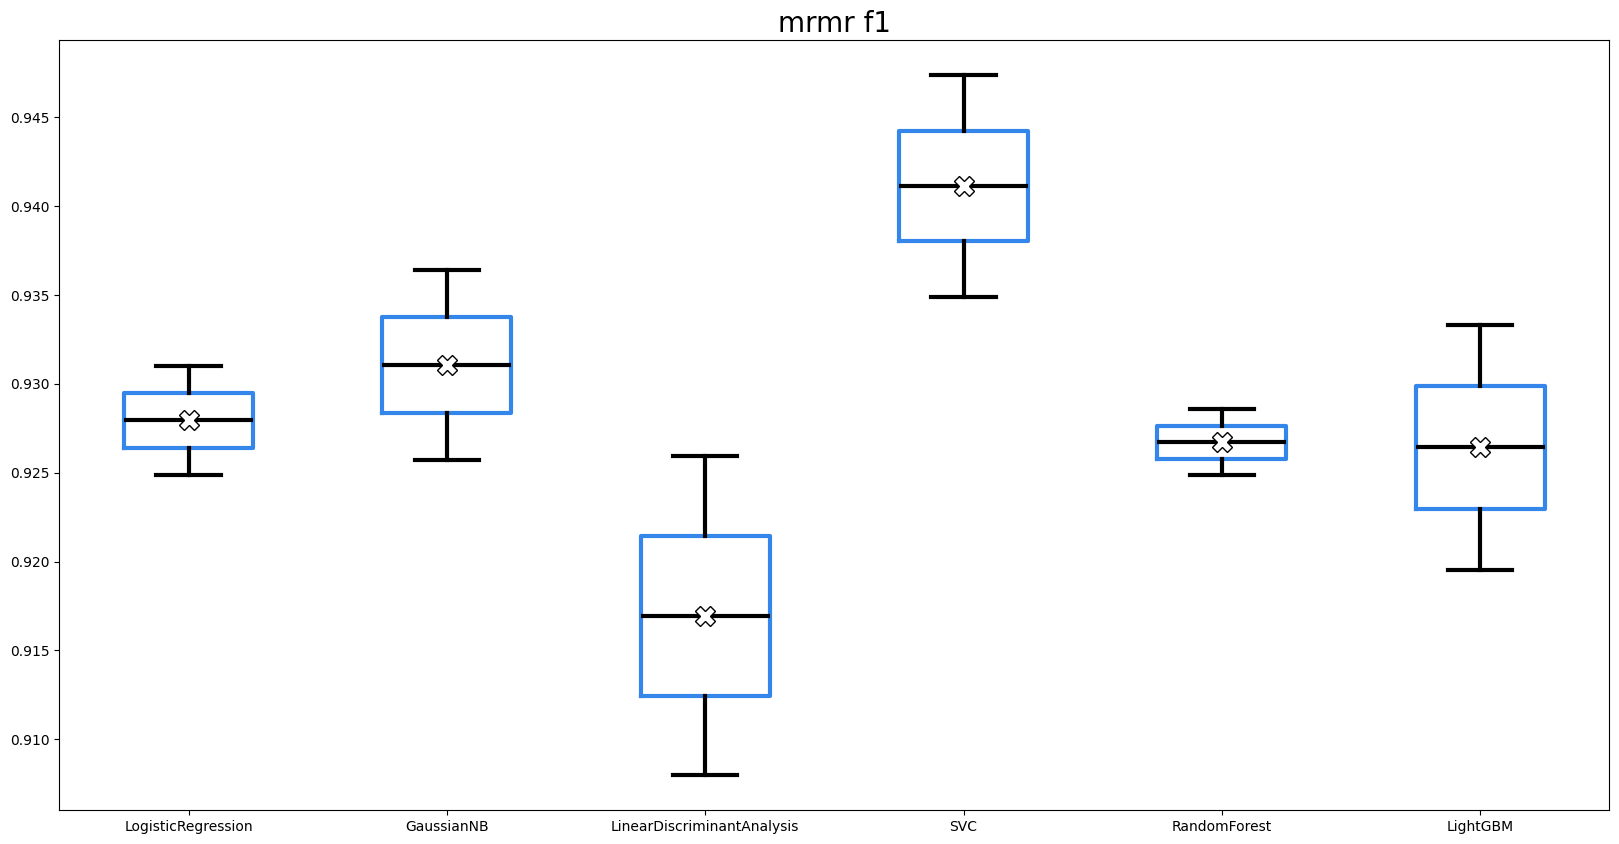

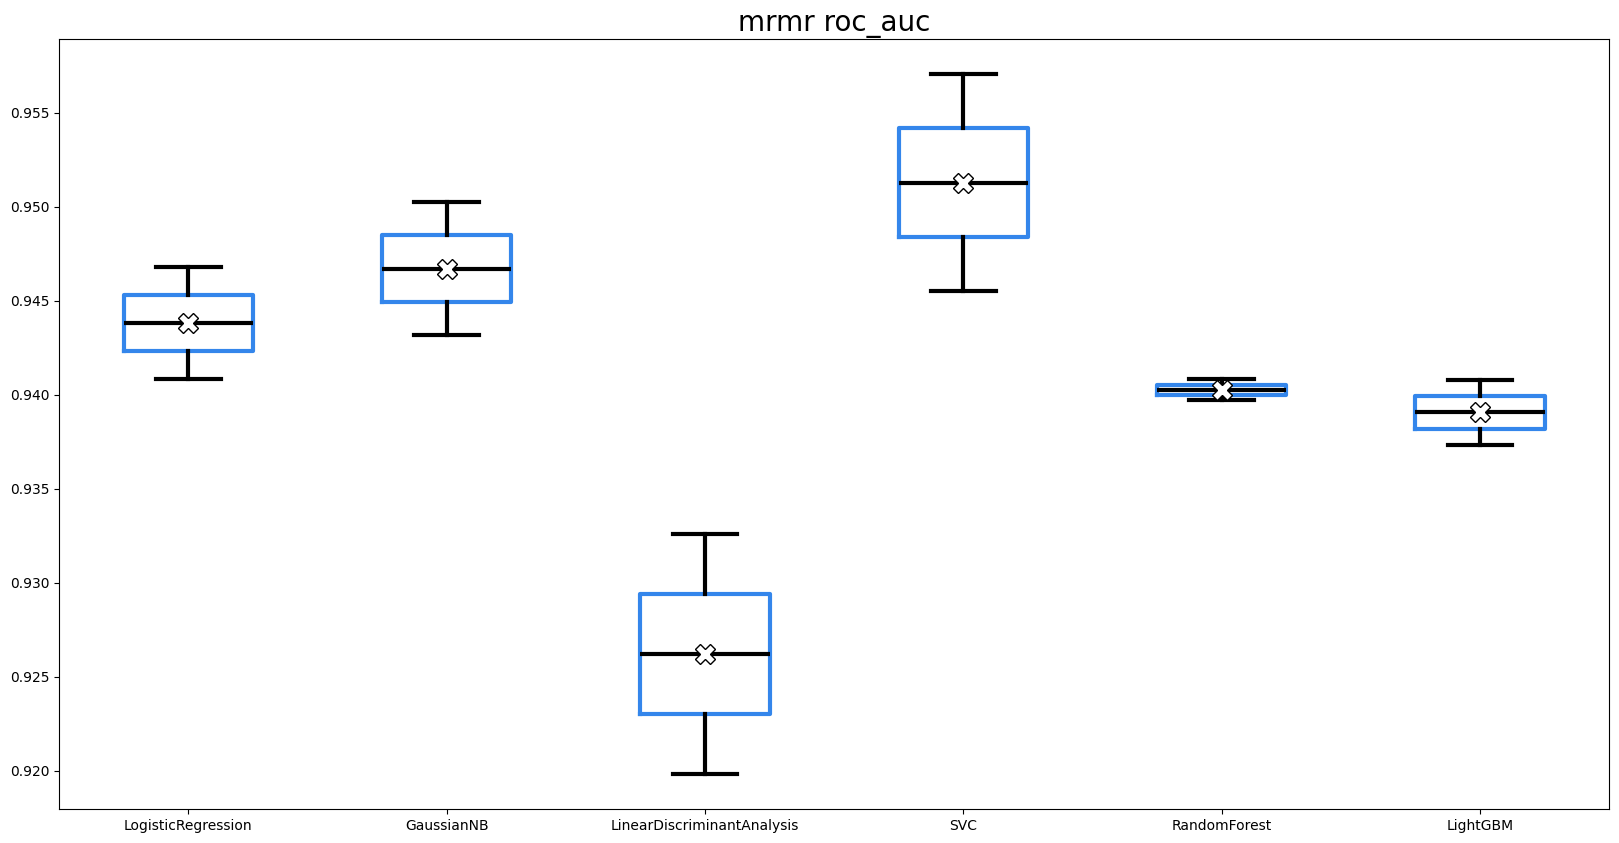

--- umap ---


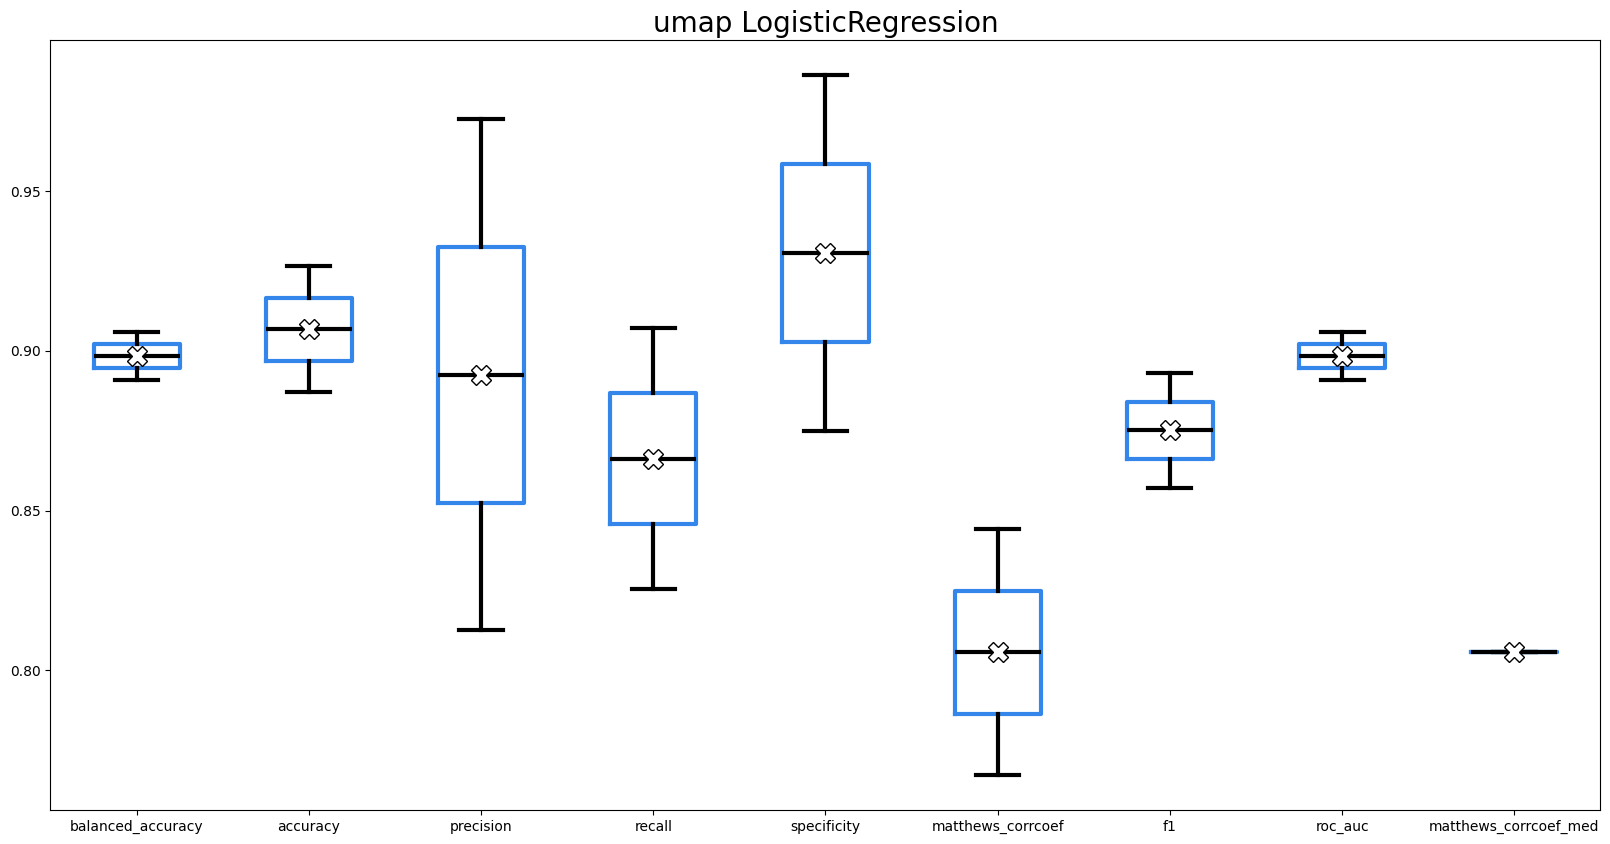

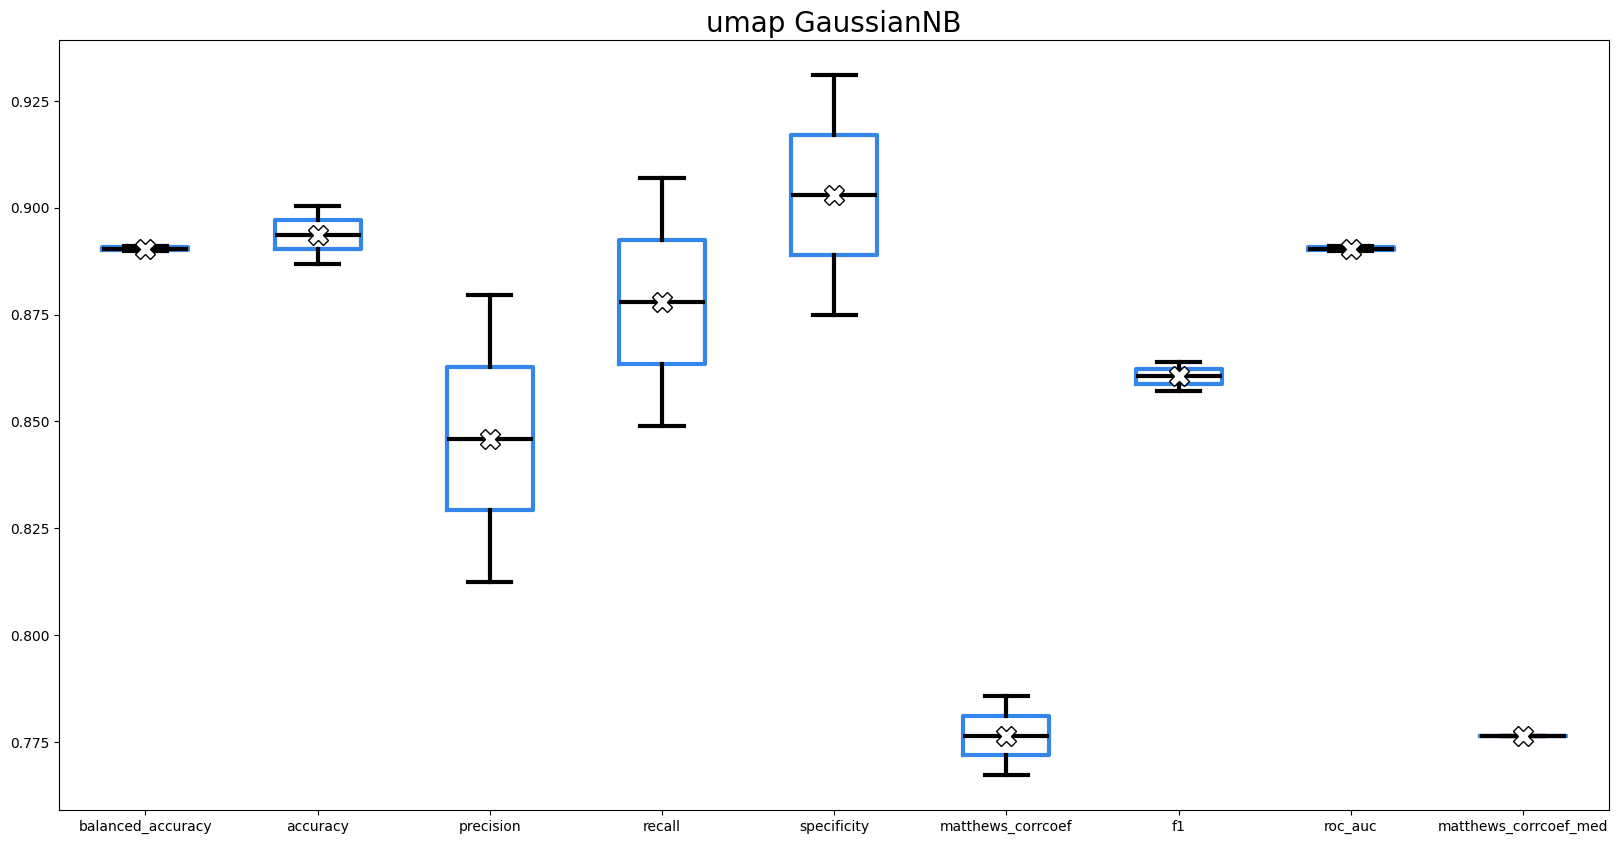

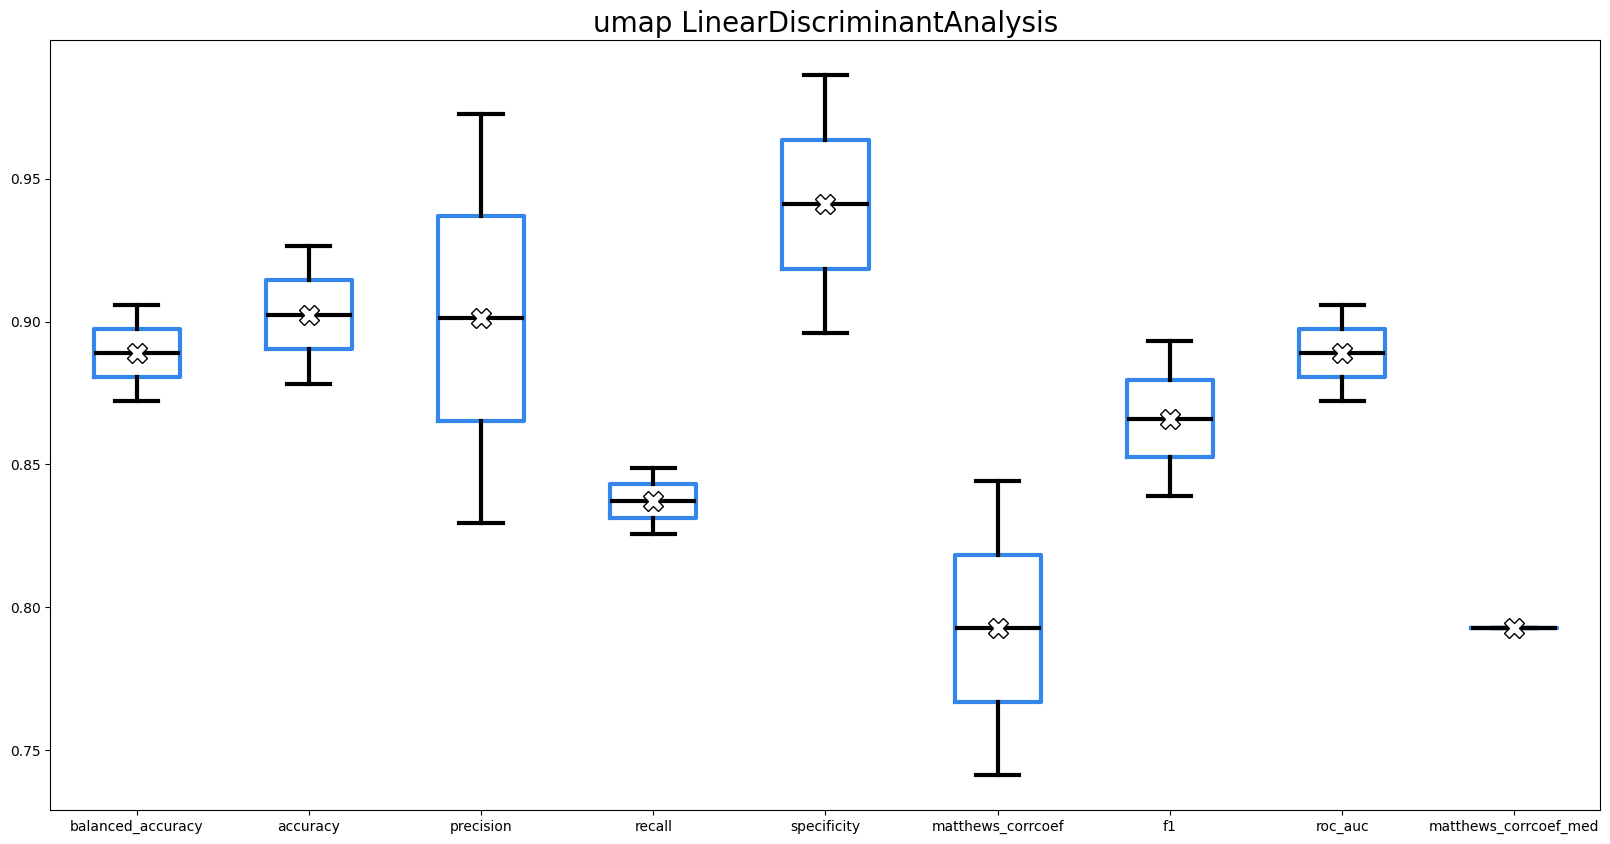

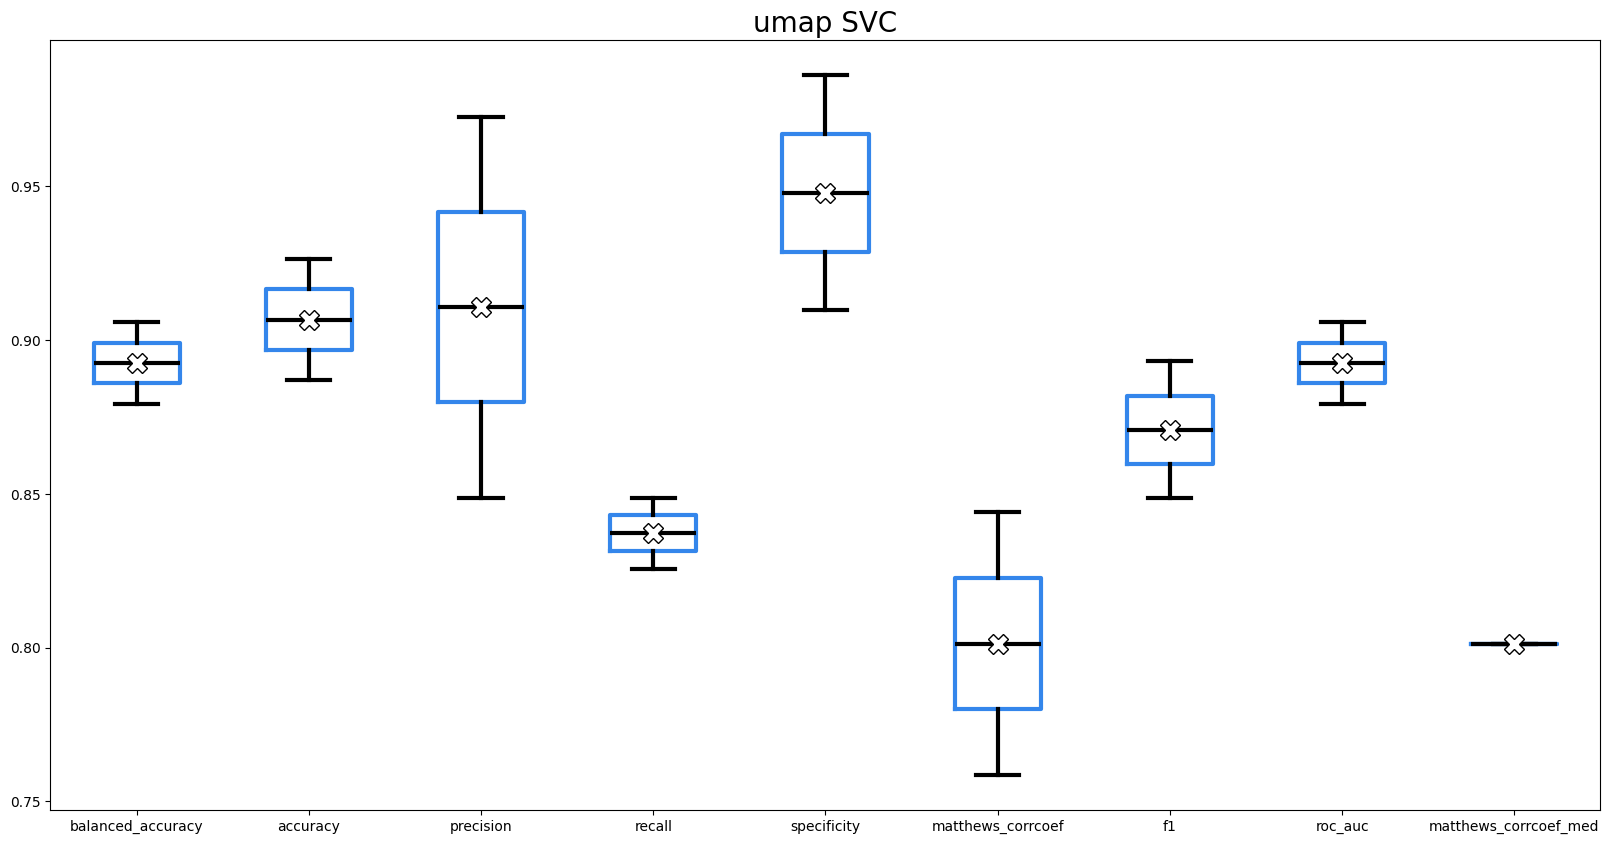

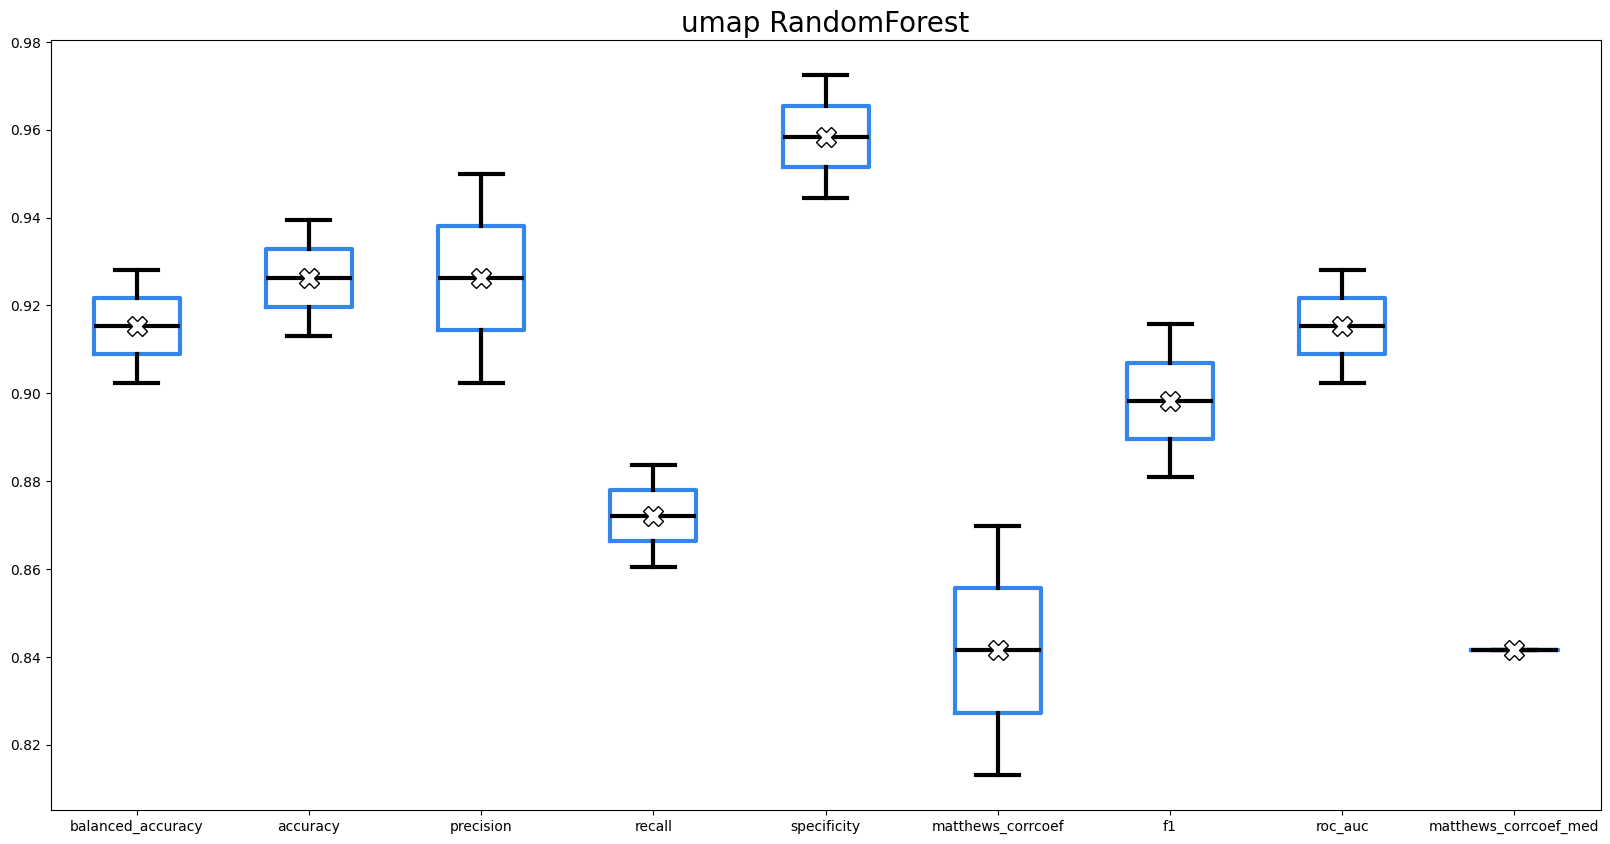

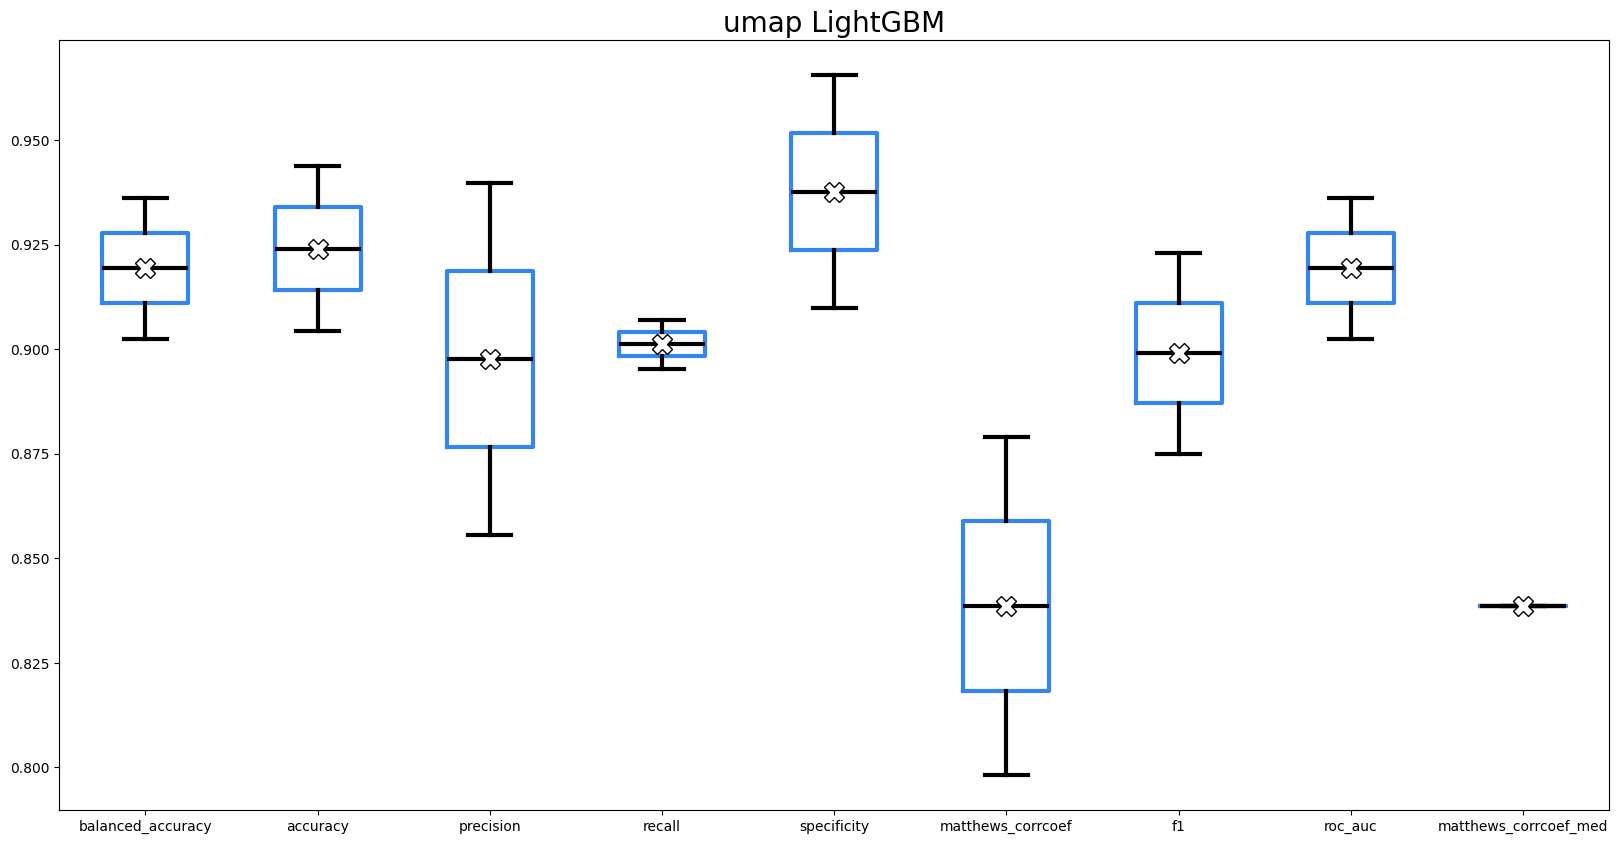

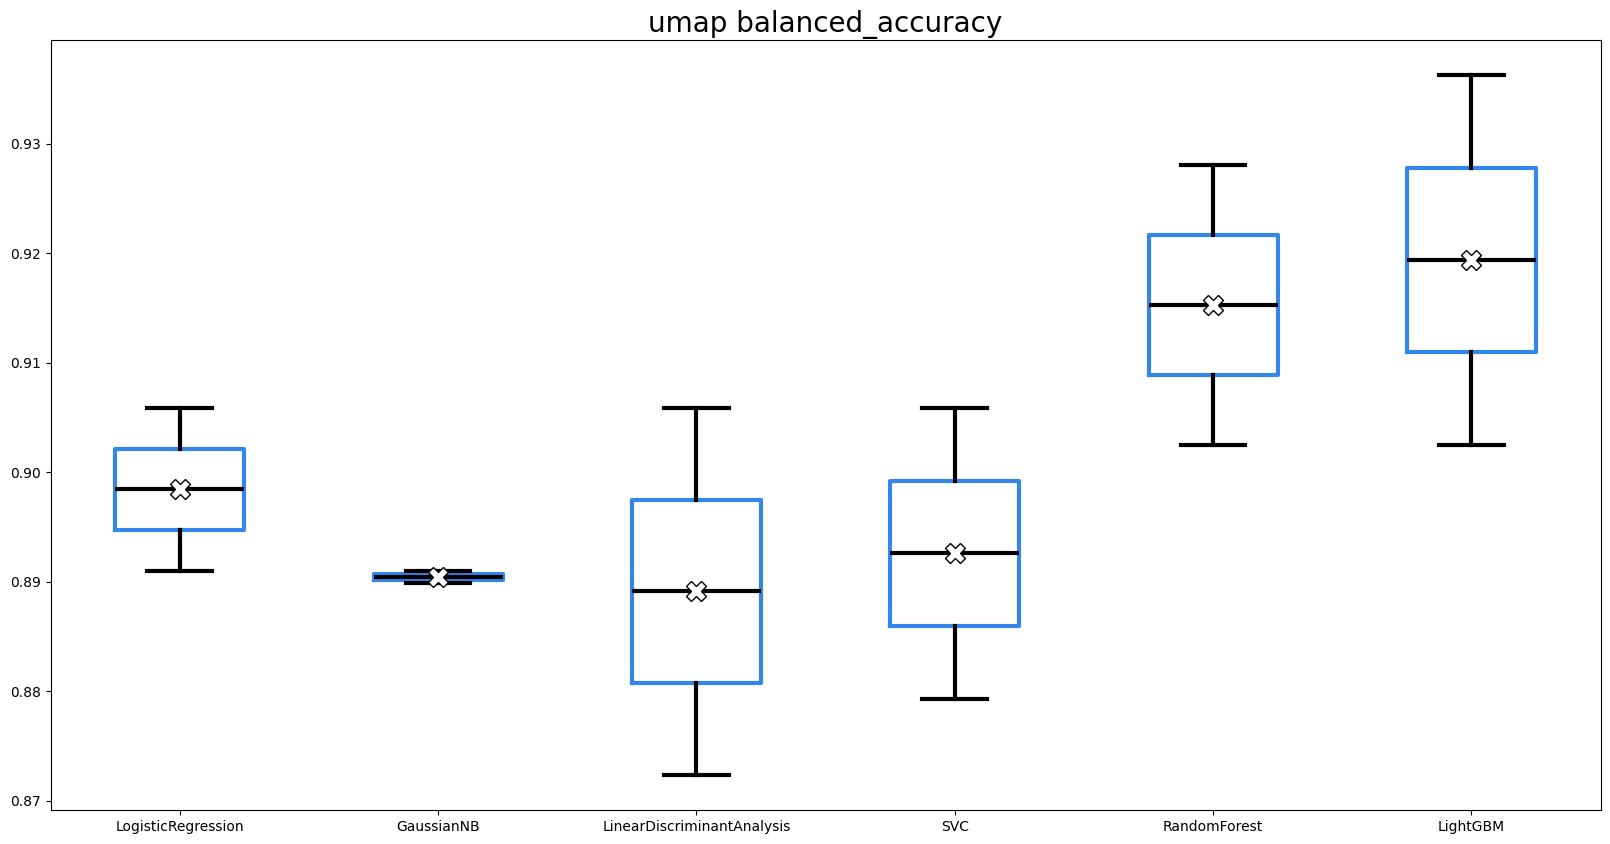

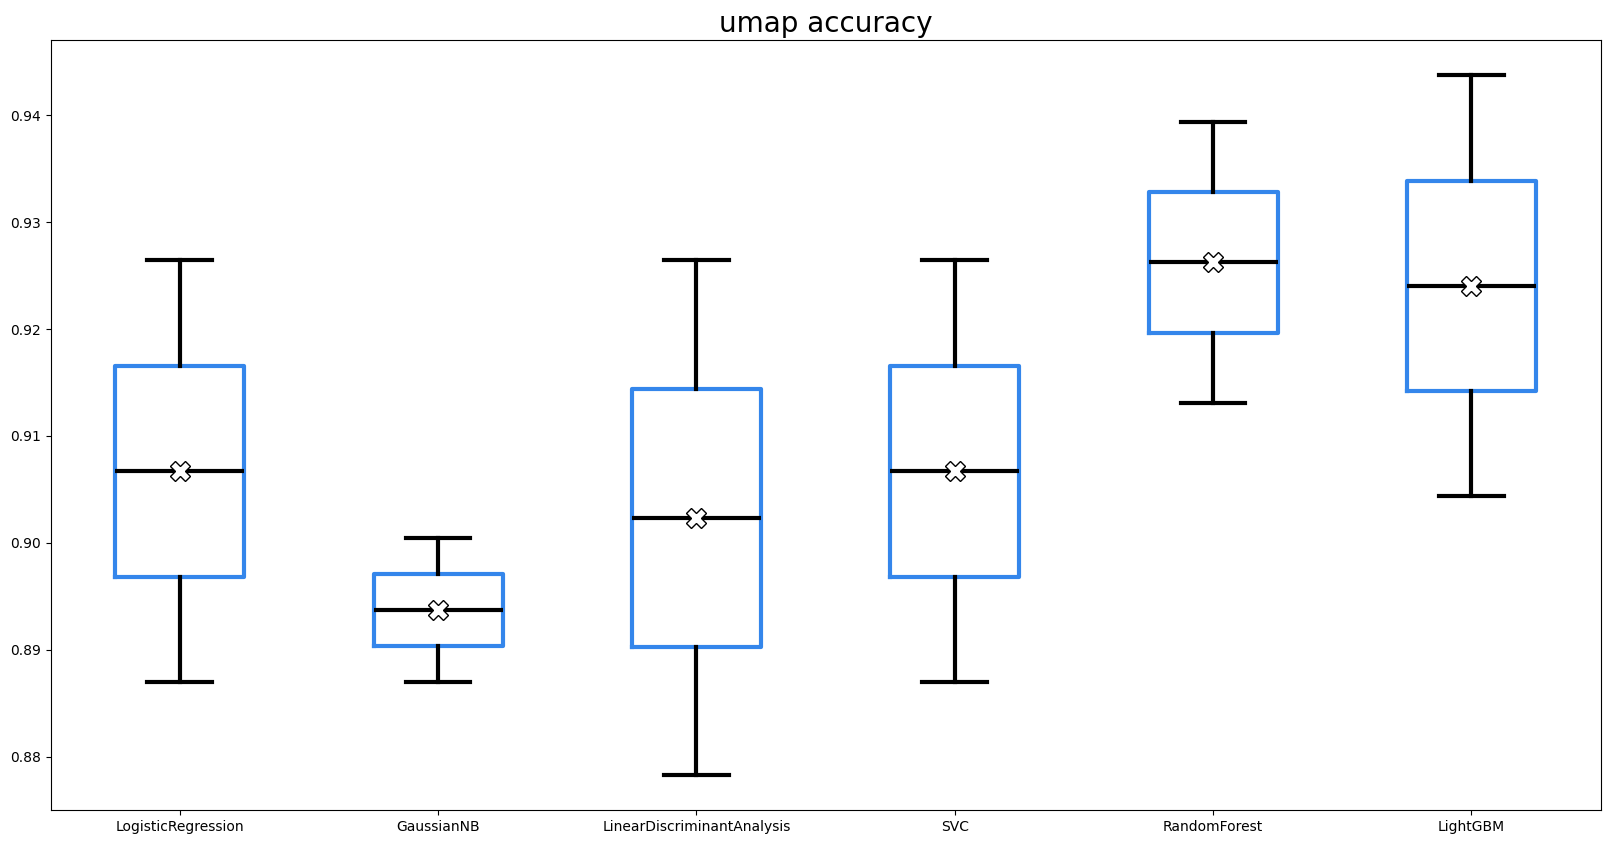

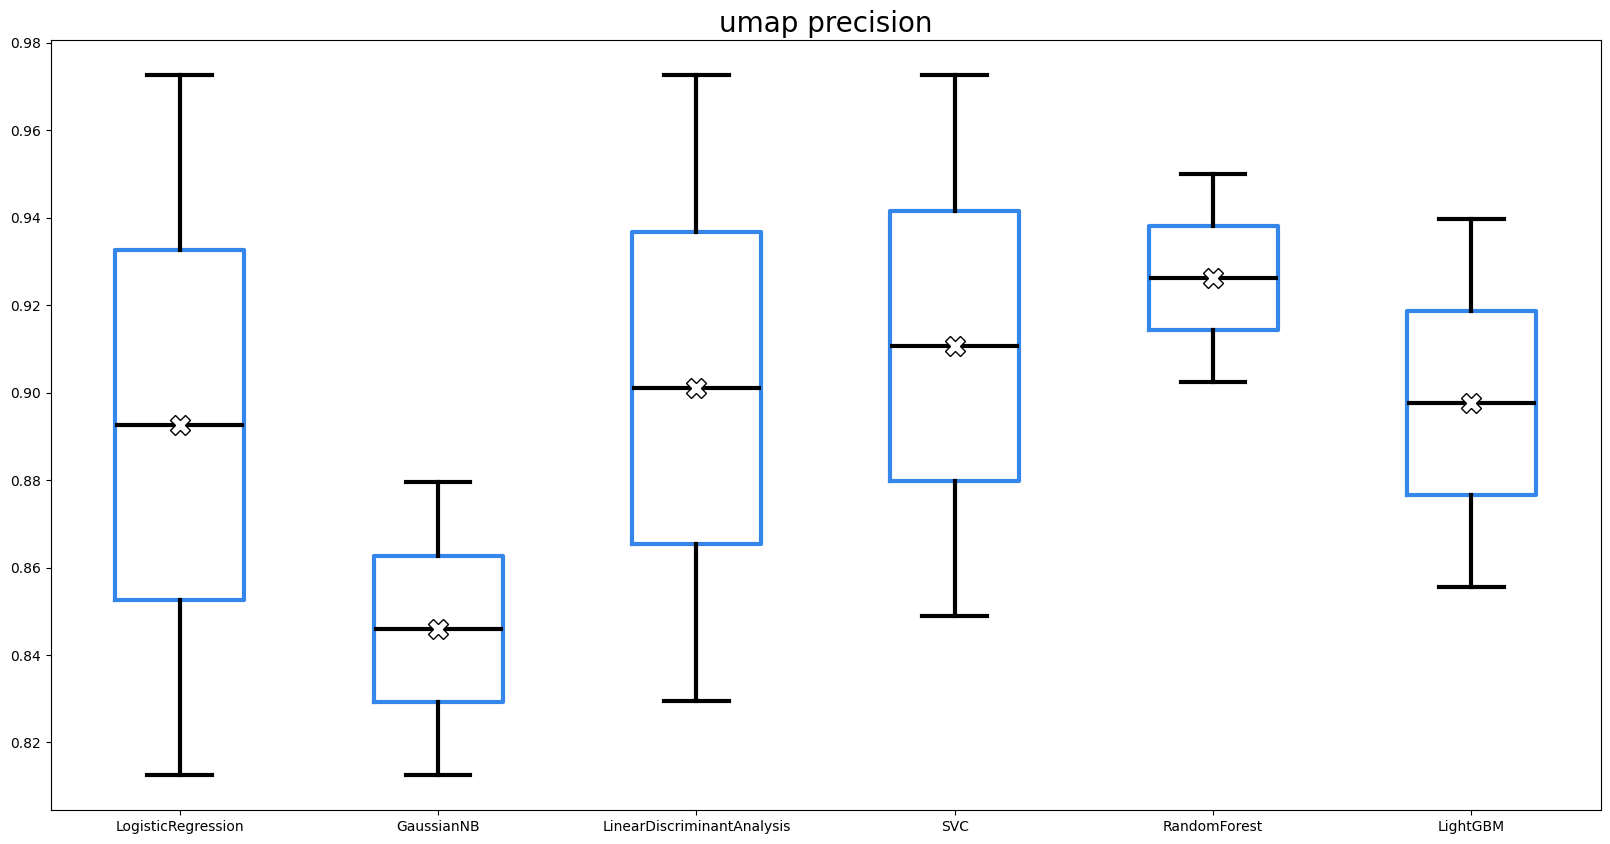

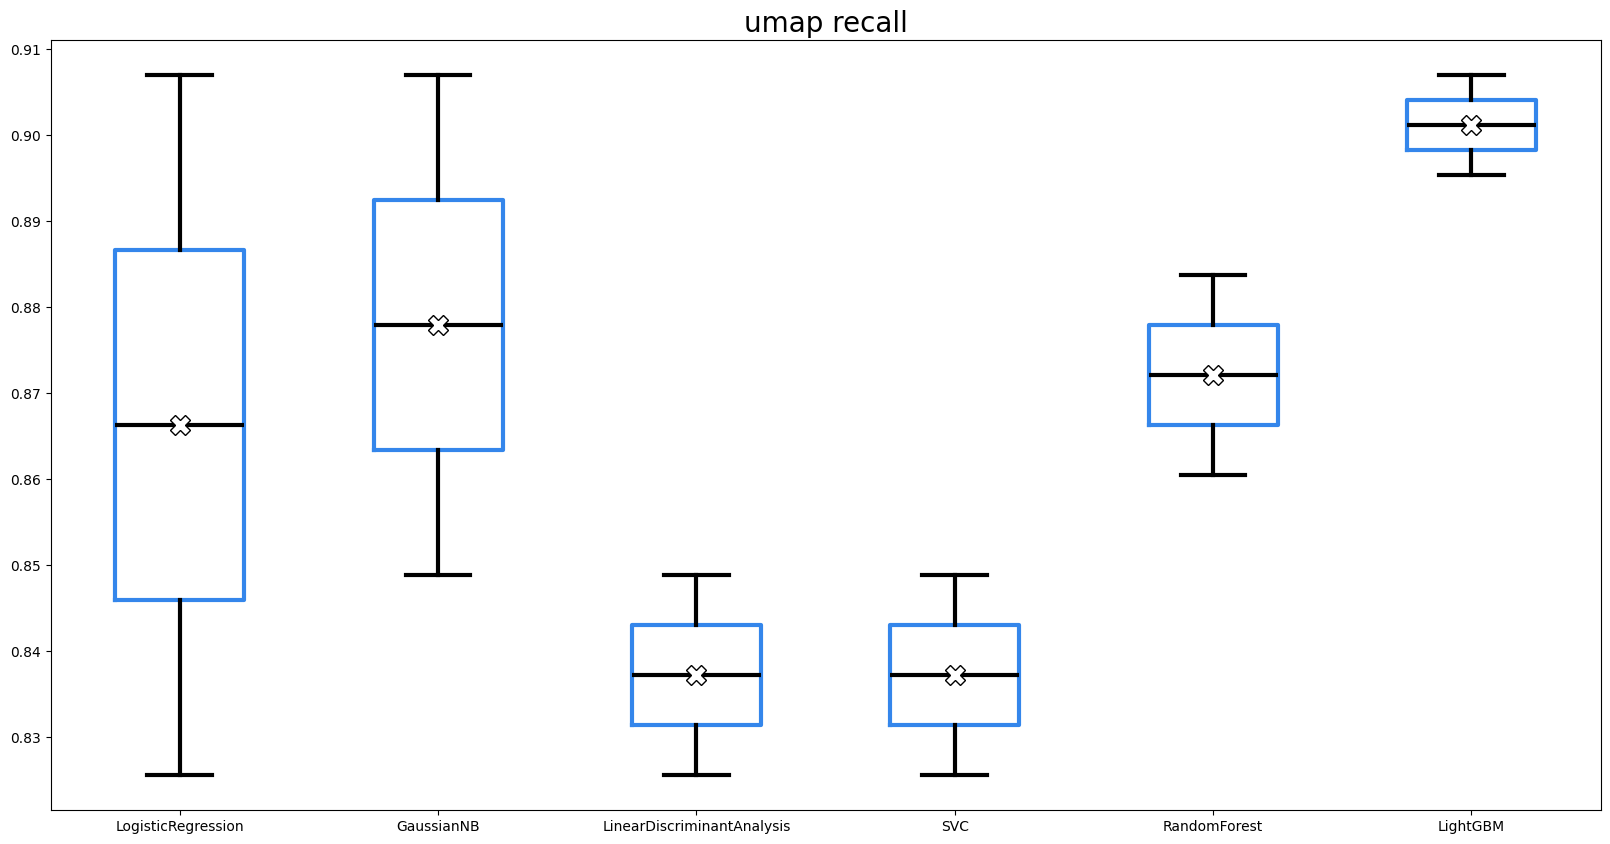

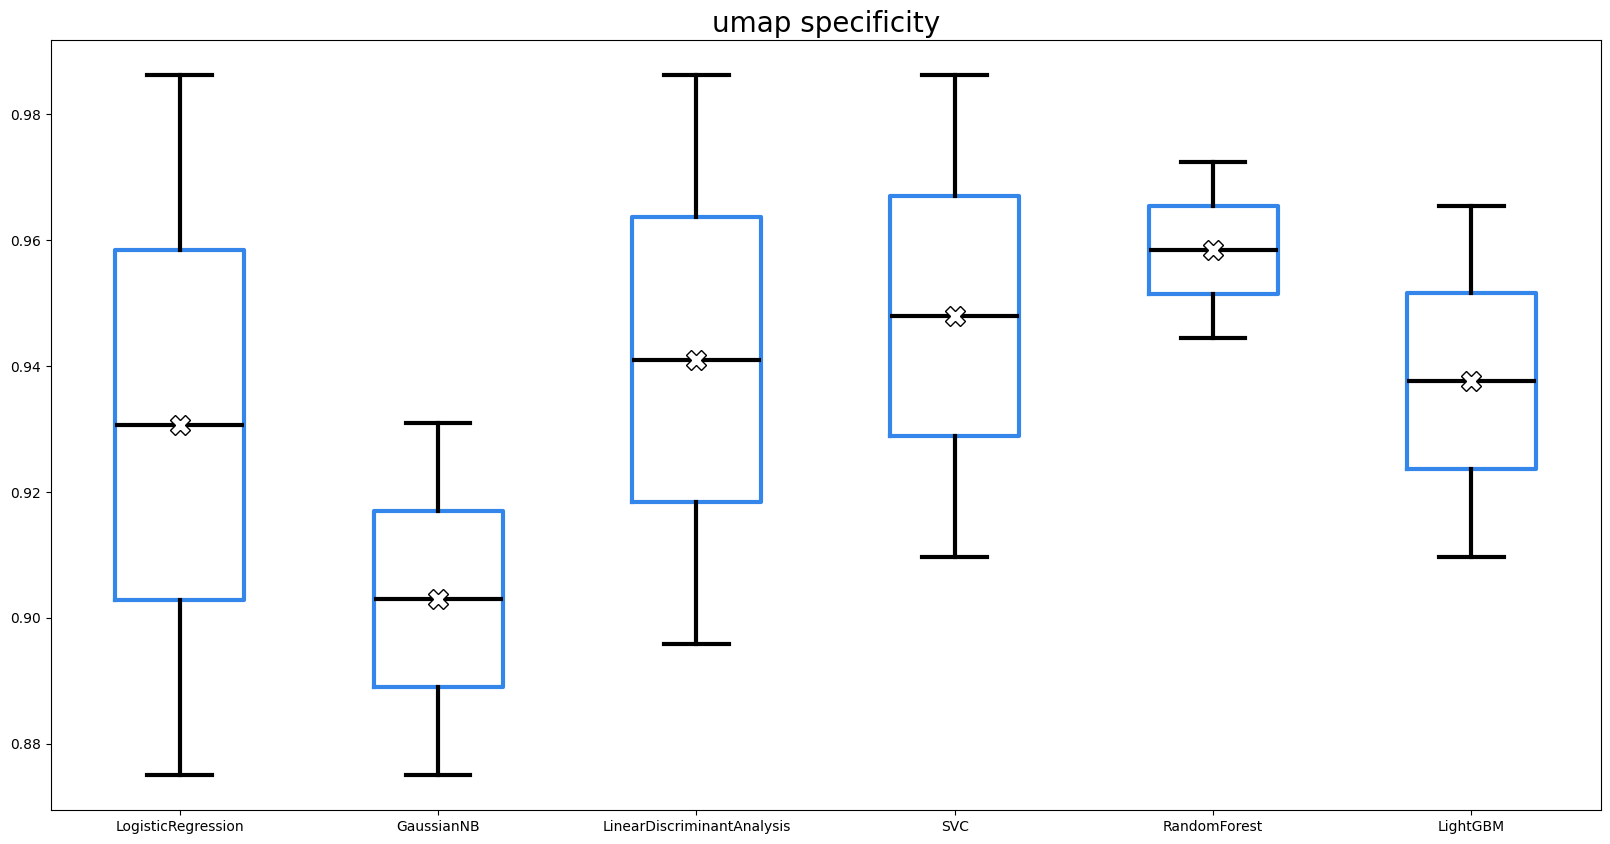

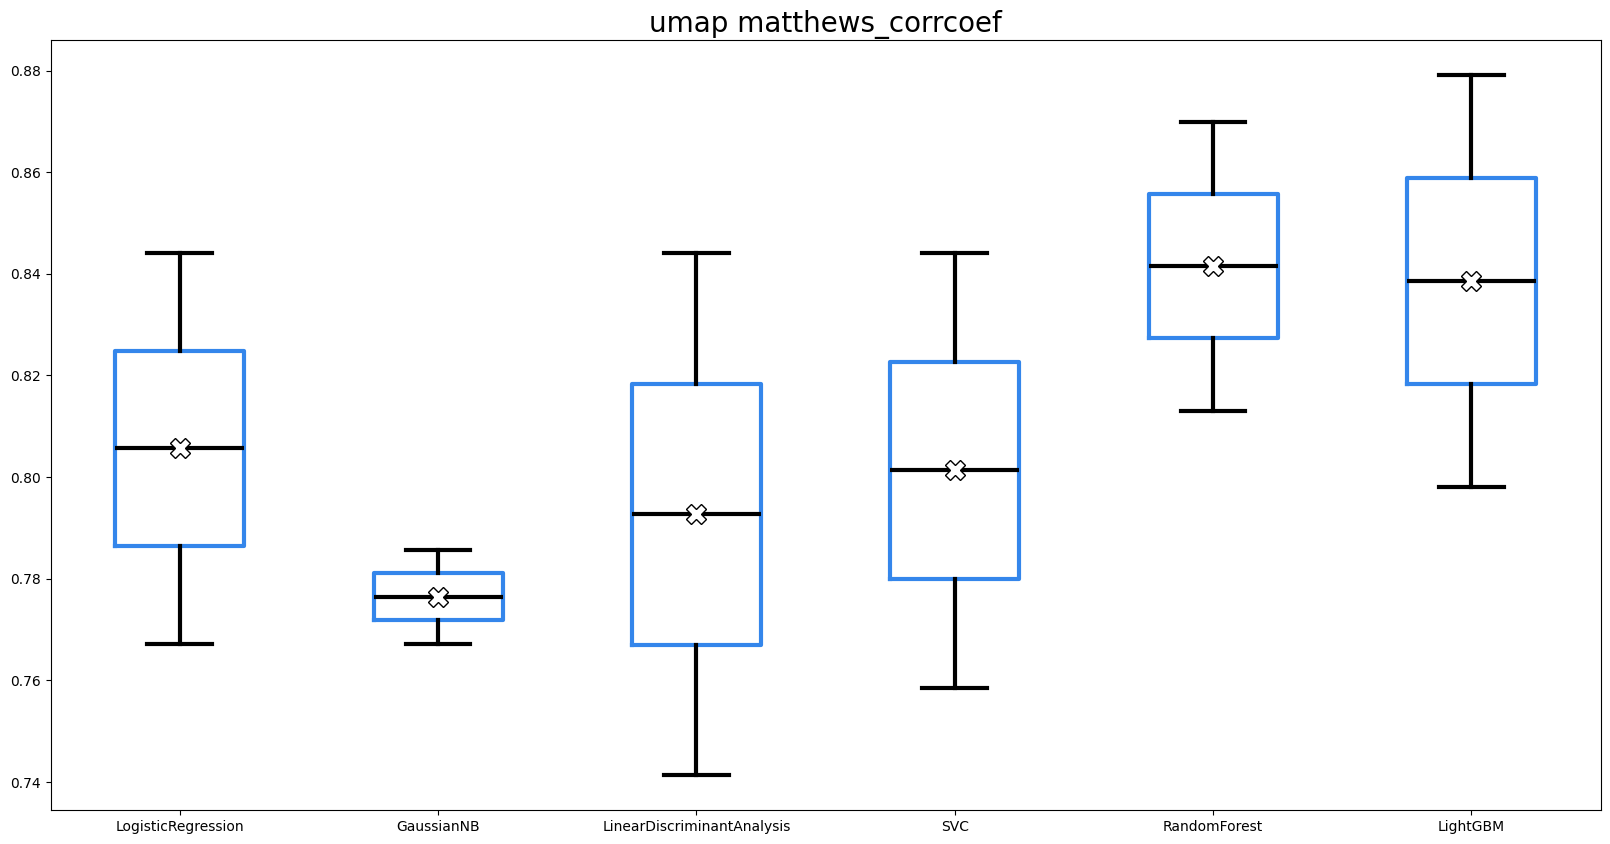

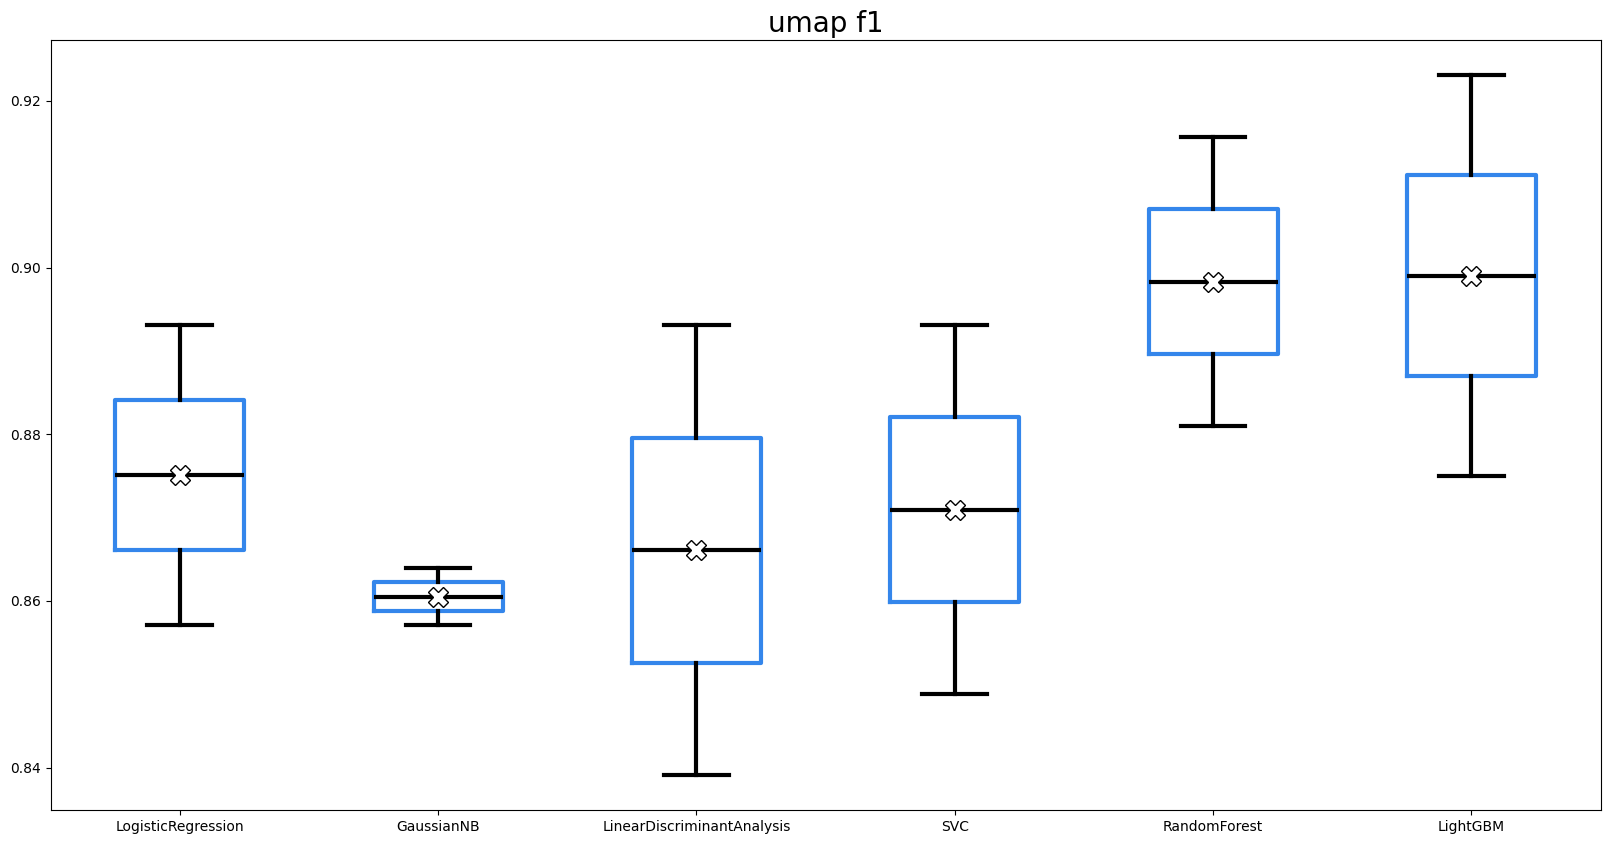

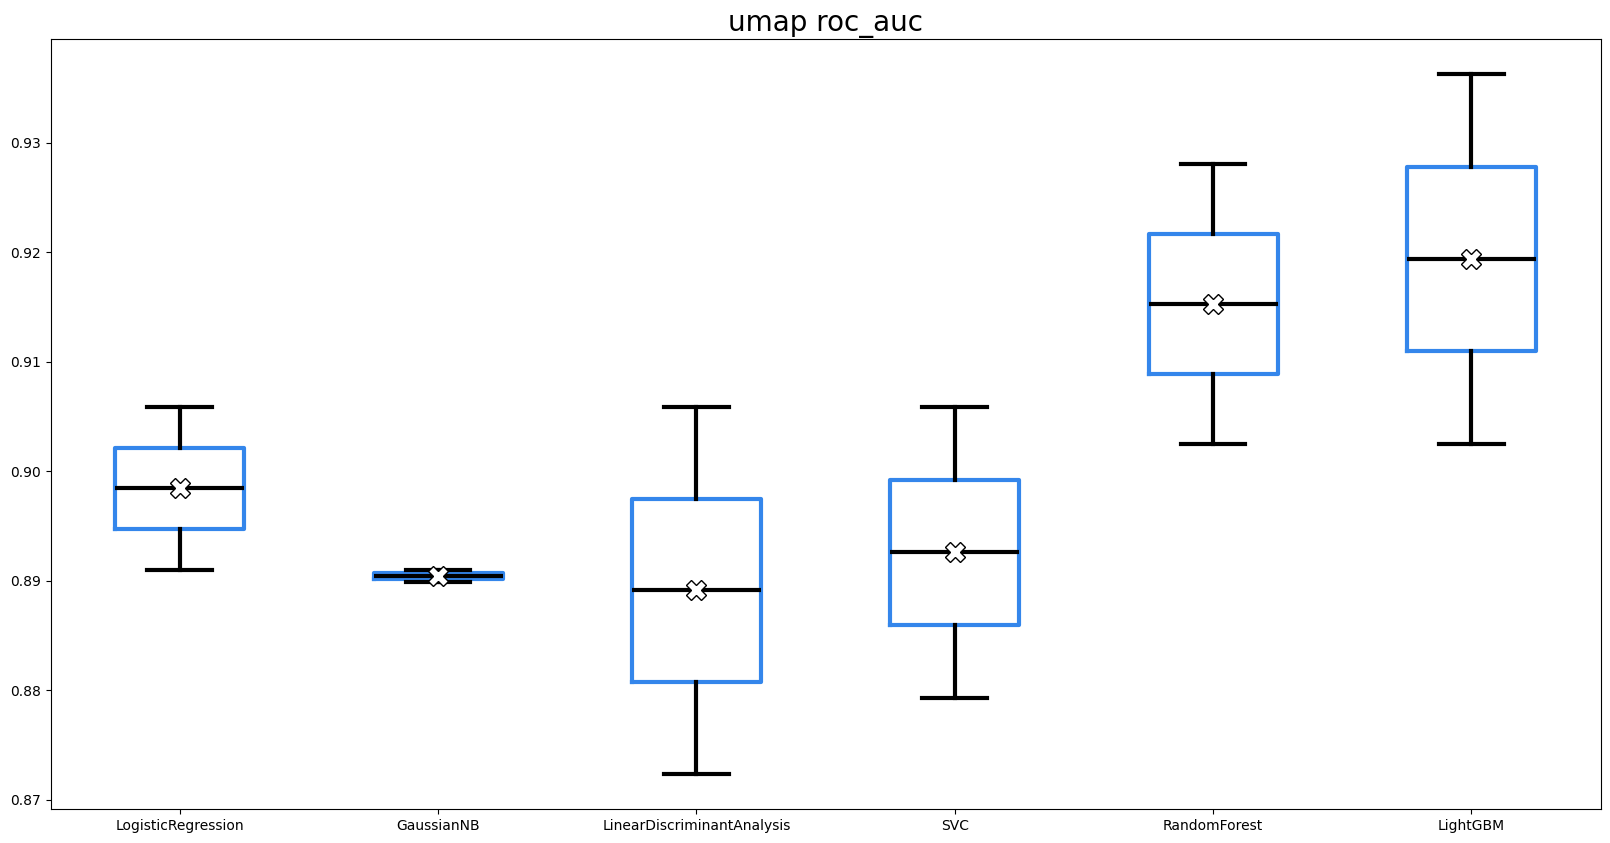

In [4]:
for fs in ["baseline", "mrmr", "umap"]:
    print(f"--- {fs} ---")
    dfLR = pd.read_csv(
        os.path.join(RESULTS_DIR, fs, "LogisticRegression_summary.csv")
    )
    dfGNB = pd.read_csv(
        os.path.join(RESULTS_DIR, fs, "GaussianNB_summary.csv")
    )
    dfLDA = pd.read_csv(
        os.path.join(RESULTS_DIR, fs, "LinearDiscriminantAnalysis_summary.csv")
    )
    dfSVC = pd.read_csv(
        os.path.join(RESULTS_DIR, fs, "SVC_summary.csv")
    )
    dfRF = pd.read_csv(
        os.path.join(RESULTS_DIR, fs, "RandomForestClassifier_summary.csv")
    )
    dfLGBM = pd.read_csv(
        os.path.join(RESULTS_DIR, fs, "LGBMClassifier_summary.csv")
    )

    visualize_training_summary_boxplots(
        names=[
            "LogisticRegression", "GaussianNB", "LinearDiscriminantAnalysis",
            "SVC", "RandomForest", "LightGBM"
        ],
        dfs=[dfLR, dfGNB, dfLDA, dfSVC, dfRF, dfLGBM],
        fs=fs,
        boxplot_kws={
            "figsize": (20, 10),
            "metrics": [
                "balanced_accuracy", "accuracy", "precision", "recall",
                "specificity", "matthews_corrcoef", "f1", "roc_auc"
            ],
            "showmeans": True,
            "meanprops": {
                "marker": "X", "markerfacecolor": "white",
                "markeredgecolor": "black", "markersize": 15
            },
            "boxprops": {
                "linewidth": 3, "color": "#3486eb"
            },
            "medianprops": {
                "color": "black", "linewidth": 3
            },
            "flierprops": {
                "markerfacecolor": "red", "markeredgecolor": "white",
                "markersize": 10
            },
            "wiswidth": 3
        }
    )

In [5]:
for fs in ["baseline", "mrmr", "umap"]:
    print(f"--- {fs:^42} ---\n")
    tabulate_hyperparameter_spaces(
        [
            "LogisticRegression",
            "GaussianNB",
            "LinearDiscriminantAnalysis",
            "SVC",
            "RandomForestClassifier",
            "LGBMClassifier"
        ],
        [
            os.path.join(MODELS_DIR, fs, "LogisticRegression_params.json"),
            os.path.join(MODELS_DIR, fs, "GaussianNB_params.json"),
            os.path.join(MODELS_DIR, fs, "LinearDiscriminantAnalysis_params.json"),
            os.path.join(MODELS_DIR, fs, "SVC_params.json"),
            os.path.join(MODELS_DIR, fs, "RandomForestClassifier_params.json"),
            os.path.join(MODELS_DIR, fs, "LGBMClassifier_params.json")
        ]
    )
    print()

---                  baseline                  ---

                LogisticRegression                
C                        |      0.13675500834932947
l1_ratio                 |       0.6989407799152884
max_iter                 |                     4581
class_weight             |                     None



                    GaussianNB                    
var_smoothing            |    9.445847528163508e-09



            LinearDiscriminantAnalysis            
solver                   |                     lsqr
shrinkage                |                     auto
priors                   |                 0.5, 0.5



                       SVC                        
C                        |       0.9379399945645214
gamma                    |                     auto
coef0                    |       0.6700362811101066
kernel                   |                   linear
class_weight             |                 balanced



              RandomForestClassifier              
n_est

In [6]:
# Validate the top model's performance against the holdout set
y, y_pred, d = validate(
        models_dir=os.path.join(MODELS_DIR, "baseline"),
        model_name="LogisticRegression",
        target="diagnosis",
        n_bootstraps=1000,
        data_dir=DATA_DIR,
        file_name="holdout.csv",
        fs_method=None
    )

No FS.


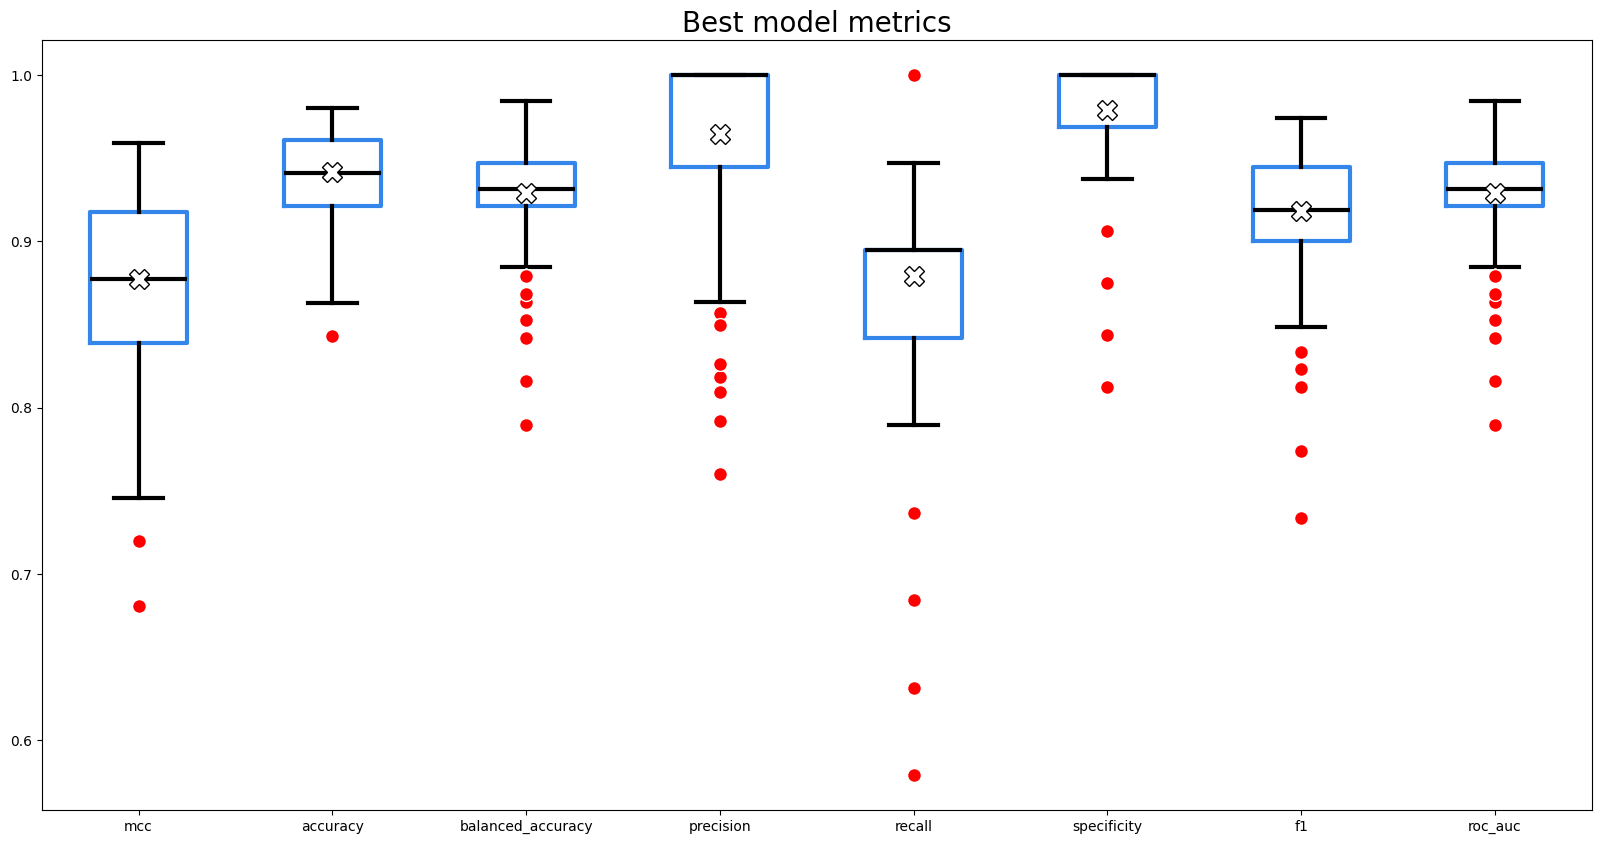

In [8]:
visualize_bootstrap_results(
    d
)